# Анализ для интернет-магазина «Стримчик»

Интернет-магазин «Стримчик» продаёт по всему миру компьютерные игры. Из открытых источников доступны исторические данные о продажах игр, оценки пользователей и экспертов, жанры и платформы (например, Xbox или PlayStation).

***
### Задача:

Необходимо выявить определяющие успешность игры закономерности. Это позволит сделать ставку на потенциально популярный продукт и спланировать рекламные кампании на 2017г.


### Описание данных
    
* Name — название игры
* Platform — платформа
* Year_of_Release — год выпуска
* Genre — жанр игры
* NA_sales — продажи в Северной Америке (миллионы проданных копий)
* EU_sales — продажи в Европе (миллионы проданных копий)
* JP_sales — продажи в Японии (миллионы проданных копий)
* Other_sales — продажи в других странах (миллионы проданных копий)
* Critic_Score — оценка критиков (максимум 100)
* User_Score — оценка пользователей (максимум 10)
* Rating — рейтинг от организации ESRB (англ. Entertainment Software Rating Board). Эта ассоциация определяет рейтинг компьютерных игр и присваивает им подходящую возрастную категорию.

Данные за 2016 год могут быть неполными.

Аббревиатура ESRB (Entertainment Software Rating Board) — это ассоциация, определяющая возрастной рейтинг компьютерных игр. ESRB оценивает игровой контент и присваивает ему подходящую возрастную категорию, например, «Для взрослых», «Для детей младшего возраста» или «Для подростков».


***

### План работ:

**[Шаг 1.](#section_1)** Загрузка данных, изучение общей информации.

**[Шаг 2.](#section_2)** Предобработка данных.

**[Шаг 3.](#section_3)** Исследовательский анализ данных (как менялись продажи по годам, по платформам; влияние жанра/оценок критиков или пользователей на прибыль и тд.)

**[Шаг 4.](#section_4)** Составление портрета пользователя каждого региона - анализ популярных платформ, жанров и рейтингов ESBR в каждом регионе.

**[Шаг 5.](#section_5)** Проверка гипотез:

 1) Одинаковы ли средние пользовательские рейтинги платформ Xbox One и PC?

 2) Различаются ли средние пользовательские рейтинги жанров Action и Sports?

**[Шаг 6.](#section_6)** Общий вывод.

<a id='section_1'></a>
### Шаг 1. Загрузка данных, изучение общей информации

In [1]:
#Загрузка нужных библиотек:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

import matplotlib.ticker as ticker
from matplotlib.ticker import MultipleLocator

from scipy import stats as st
from math import sqrt

In [2]:
#Сохраняем данные в датафрейм
games = pd.read_csv('C:/Users/ratus/DATA_SCIENCE/итоговые проекты/3/games.csv')

In [3]:
#Общая информация по датафрейму
games.info()

#Несколько строк датафрейма
games.head(10)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16715 entries, 0 to 16714
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Name             16713 non-null  object 
 1   Platform         16715 non-null  object 
 2   Year_of_Release  16446 non-null  float64
 3   Genre            16713 non-null  object 
 4   NA_sales         16715 non-null  float64
 5   EU_sales         16715 non-null  float64
 6   JP_sales         16715 non-null  float64
 7   Other_sales      16715 non-null  float64
 8   Critic_Score     8137 non-null   float64
 9   User_Score       10014 non-null  object 
 10  Rating           9949 non-null   object 
dtypes: float64(6), object(5)
memory usage: 1.4+ MB


,Name,Platform,Year_of_Release,Genre,NA_sales,EU_sales,JP_sales,Other_sales,Critic_Score,User_Score,Rating
0,Wii Sports,Wii,2006.0,Sports,41.36,28.96,3.77,8.45,76.0,8,E
1,Super Mario Bros.,NES,1985.0,Platform,29.08,3.58,6.81,0.77,NaN,NaN,NaN
2,Mario Kart Wii,Wii,2008.0,Racing,15.68,12.76,3.79,3.29,82.0,8.3,E
3,Wii Sports Resort,Wii,2009.0,Sports,15.61,10.93,3.28,2.95,80.0,8,E
4,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,11.27,8.89,10.22,1.00,NaN,NaN,NaN
5,Tetris,GB,1989.0,Puzzle,23.20,2.26,4.22,0.58,NaN,NaN,NaN
6,New Super Mario Bros.,DS,2006.0,Platform,11.28,9.14,6.50,2.88,89.0,8.5,E
7,Wii Play,Wii,2006.0,Misc,13.96,9.18,2.93,2.84,58.0,6.6,E
8,New Super Mario Bros. Wii,Wii,2009.0,Platform,14.44,6.94,4.70,2.24,87.0,8.4,E
9,Duck Hunt,NES,1984.0,Shooter,26.93,0.63,0.28,0.47,NaN,NaN,NaN


В полученных данных содержится информация о 16715 играх.

Необходимо будет заменить названия столбцов (привести к нижнему регистру).

Тип столбца `Year_of_Release` нужно будет заменить на целочисленный, так как год не может быть дробным

Тип столбца `User_Score` нужно будет поменять на численный, так как заявлено что это оценка от 0 до 10.

In [4]:
#Процент пропущ. значений для каждого столбца датафрейма
(games.isna().mean() * 100).sort_values(ascending=False).to_frame()

,0
Critic_Score,51.319174
Rating,40.478612
User_Score,40.089740
Year_of_Release,1.609333
Name,0.011965
Genre,0.011965
Platform,0.000000
NA_sales,0.000000
EU_sales,0.000000
JP_sales,0.000000


В 6 столбцах содержатся пропуски. 

Более 50% пропусков в столбце `Critic_Score`, и более 40% в столбцах `Rating` и `User_Score`.

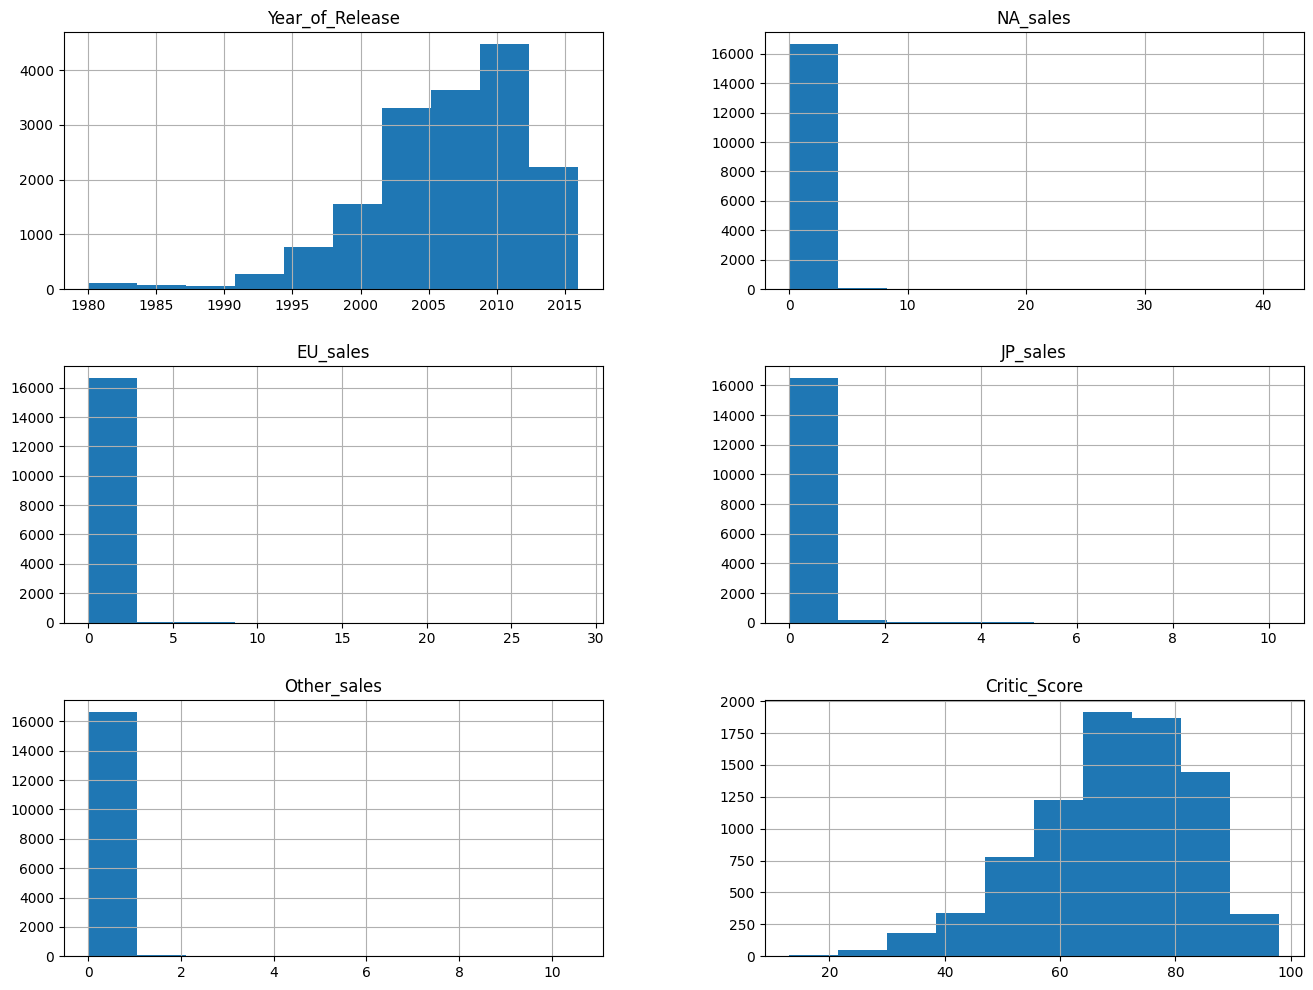

In [5]:
# Общая гистограмма для всех числовых столбцов
games.hist(figsize=(16, 12));

В столбцах по продажам есть аномальные данные, исследуем и исключим их в следующем шаге.

<a id='section_2'></a>
### Шаг 2. Предобработка данных

#### 2.1 Заменим названия столбцов

In [6]:
# Приводим данные столбцов к нижнему регистру
games.columns = games.columns.str.lower()

#Проверяем:
games.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16715 entries, 0 to 16714
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   name             16713 non-null  object 
 1   platform         16715 non-null  object 
 2   year_of_release  16446 non-null  float64
 3   genre            16713 non-null  object 
 4   na_sales         16715 non-null  float64
 5   eu_sales         16715 non-null  float64
 6   jp_sales         16715 non-null  float64
 7   other_sales      16715 non-null  float64
 8   critic_score     8137 non-null   float64
 9   user_score       10014 non-null  object 
 10  rating           9949 non-null   object 
dtypes: float64(6), object(5)
memory usage: 1.4+ MB


#### 2.2 Преобразуем данные в нужные типы:

Нам нужно поменять типы у слобцов `year_of_release`,`user_score`
В начале не забудем проверять что встречается в этих столбцах.

Заодно проверим данные за какие года встречаются.

In [7]:
games['year_of_release'].sort_values().unique()

array([1980., 1981., 1982., 1983., 1984., 1985., 1986., 1987., 1988.,
       1989., 1990., 1991., 1992., 1993., 1994., 1995., 1996., 1997.,
       1998., 1999., 2000., 2001., 2002., 2003., 2004., 2005., 2006.,
       2007., 2008., 2009., 2010., 2011., 2012., 2013., 2014., 2015.,
       2016.,   nan])

В столбце `year_of_release` встречаются только года (с 1980-2016г) и пропущенные значения.  Заменим  тип столбца на целочисленный, так как год не может быть дробным.

In [8]:
#Меняем тип столбца
games['year_of_release'] = games['year_of_release'].astype('Int64')

#Проверяем
games.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16715 entries, 0 to 16714
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   name             16713 non-null  object 
 1   platform         16715 non-null  object 
 2   year_of_release  16446 non-null  Int64  
 3   genre            16713 non-null  object 
 4   na_sales         16715 non-null  float64
 5   eu_sales         16715 non-null  float64
 6   jp_sales         16715 non-null  float64
 7   other_sales      16715 non-null  float64
 8   critic_score     8137 non-null   float64
 9   user_score       10014 non-null  object 
 10  rating           9949 non-null   object 
dtypes: Int64(1), float64(5), object(5)
memory usage: 1.4+ MB


Теперь разберемся со следующим столбцом `user_score`

In [9]:
games['user_score'].unique()

array(['8', nan, '8.3', '8.5', '6.6', '8.4', '8.6', '7.7', '6.3', '7.4',
       '8.2', '9', '7.9', '8.1', '8.7', '7.1', '3.4', '5.3', '4.8', '3.2',
       '8.9', '6.4', '7.8', '7.5', '2.6', '7.2', '9.2', '7', '7.3', '4.3',
       '7.6', '5.7', '5', '9.1', '6.5', 'tbd', '8.8', '6.9', '9.4', '6.8',
       '6.1', '6.7', '5.4', '4', '4.9', '4.5', '9.3', '6.2', '4.2', '6',
       '3.7', '4.1', '5.8', '5.6', '5.5', '4.4', '4.6', '5.9', '3.9',
       '3.1', '2.9', '5.2', '3.3', '4.7', '5.1', '3.5', '2.5', '1.9', '3',
       '2.7', '2.2', '2', '9.5', '2.1', '3.6', '2.8', '1.8', '3.8', '0',
       '1.6', '9.6', '2.4', '1.7', '1.1', '0.3', '1.5', '0.7', '1.2',
       '2.3', '0.5', '1.3', '0.2', '0.6', '1.4', '0.9', '1', '9.7'],
      dtype=object)

В столбце `user_score` кроме того что численные величины представлены строками, и есть пропуски, содержится еще значение 'tbd'. Посмотрим насколько часто встречается это зачение

In [10]:
games['user_score'].value_counts()

tbd    2424
7.8     324
8       290
8.2     282
8.3     254
       ... 
0.6       2
0.2       2
0.9       2
0         1
9.7       1
Name: user_score, Length: 96, dtype: int64

Это значение встречается часто - в 2424 строках. Посмотрим есть ли какая-то причинно-следственная связь его появления 


In [11]:
games.query('user_score == "tbd"').head(30)

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
119,Zumba Fitness,Wii,2010,Sports,3.45,2.59,0.00,0.66,NaN,tbd,E
301,Namco Museum: 50th Anniversary,PS2,2005,Misc,2.08,1.35,0.00,0.54,61.0,tbd,E10+
520,Zumba Fitness 2,Wii,2011,Sports,1.51,1.03,0.00,0.27,NaN,tbd,T
645,uDraw Studio,Wii,2010,Misc,1.65,0.57,0.00,0.20,71.0,tbd,E
657,Frogger's Adventures: Temple of the Frog,GBA,<NA>,Adventure,2.15,0.18,0.00,0.07,73.0,tbd,E
718,Just Dance Kids,Wii,2010,Misc,1.52,0.54,0.00,0.18,NaN,tbd,E
726,Dance Dance Revolution X2,PS2,2009,Simulation,1.09,0.85,0.00,0.28,NaN,tbd,E10+
821,The Incredibles,GBA,2004,Action,1.15,0.77,0.04,0.10,55.0,tbd,E
881,Who wants to be a millionaire,PC,1999,Misc,1.94,0.00,0.00,0.00,NaN,tbd,E
1047,Tetris Worlds,GBA,2001,Puzzle,1.25,0.39,0.00,0.06,65.0,tbd,E


Ну какой-то особенности для этих строк не заметно. Разве что по 30 строкам видно что они в основном в 2-3 категориях `rating`, проверим так ли это. И первое впечатление, что у всех таких строк мало продаж в Японии или нет вовсе.

In [12]:
games.query('user_score == "tbd"')['rating'].unique()

array(['E', 'E10+', 'T', nan, 'M', 'EC'], dtype=object)

Нет, соотнести эти строки с определенными категориями не удалось, встречающихся категорий довольно много.

In [13]:
games.query('user_score == "tbd"')['jp_sales'].sort_values().unique()

array([0.  , 0.01, 0.02, 0.03, 0.04, 0.05, 0.06, 0.08, 0.09, 0.1 , 0.11,
       0.12, 0.13, 0.14, 0.15, 0.16, 0.17, 0.18, 0.2 , 0.25, 0.26, 0.31,
       0.47, 0.86])

С продажи в Японии аналогичная ситуация, опровергающая первое впечатление: продажи в Японии для таких строк есть. 
Идей как обработать значения 'tbd' нет, поэтому просто заменим их на пустые значения, а тип столбца приведем к численному

In [14]:
#Меняем тип столбца
games['user_score'] = pd.to_numeric(games['user_score'], errors='coerce')

#Проверяем
games.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16715 entries, 0 to 16714
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   name             16713 non-null  object 
 1   platform         16715 non-null  object 
 2   year_of_release  16446 non-null  Int64  
 3   genre            16713 non-null  object 
 4   na_sales         16715 non-null  float64
 5   eu_sales         16715 non-null  float64
 6   jp_sales         16715 non-null  float64
 7   other_sales      16715 non-null  float64
 8   critic_score     8137 non-null   float64
 9   user_score       7590 non-null   float64
 10  rating           9949 non-null   object 
dtypes: Int64(1), float64(6), object(4)
memory usage: 1.4+ MB


#### 2.3 Обработаем пропуски

In [15]:
#Процент пропущ. значений для каждого столбца датафрейма
(games.isna().mean() * 100).sort_values(ascending=False).to_frame()

,0
user_score,54.591684
critic_score,51.319174
rating,40.478612
year_of_release,1.609333
name,0.011965
genre,0.011965
platform,0.000000
na_sales,0.000000
eu_sales,0.000000
jp_sales,0.000000


Пропуски в столбцах могут быть обусловлены какой-то ошибкой записи данных или их выгрузки. (только пару пропусков в имени и жанре может и человеческая ошибка). 

Рассмотрим для начала пропуски в рейтингах пользователей и критиков.

In [16]:
#Коэф корреляции Пирсона 
print('Коэффициент корреляции = ', games['user_score'].corr(games['critic_score']))

Коэффициент корреляции =  0.580877832076724


Есть прямая связь между оценками критиков и оценками пользователей. Можно например попробовать побить оценки критиков на категории, и восстановить пропущенные оценки пользователей средними по категории, но думаю не стоит это делать. Связь не достаточно сильная (0.58 коэф корреляции, и может быть достаточное количество случаев, когда оценки критиков и пользователей будут разниться.

Каких-то еще идей по восстановлению одной категории из другой пока нет, оставим эти пропуски.

Для удобства заменим пропуски в рейтингах  на -10: 

In [17]:
games ['critic_score'] = games ['critic_score'].fillna(-10)
games ['user_score'] = games ['user_score'].fillna(-10)

Посмотрим что насчет пропусков столбца `rating`. Для удобства, заменим пропуски в `rating` на unknown и посмотрим есть ли какие-то зависимости:

In [18]:
#Заменяем пропуски на unknown
games ['rating'] = games ['rating'].fillna('unknown')

In [19]:
#Группируем по платформе 
#и смотрим количество unknown
games.query('rating == "unknown"').groupby(
    ['platform']
)['rating'].count().sort_values(ascending = False)

platform
PS      989
DS      878
PS2     680
PSP     665
PS3     379
N64     319
Wii     318
GBA     300
3DS     292
PSV     279
SNES    239
X360    210
PC      200
SAT     173
PS4     137
2600    133
NES      98
GB       98
XB       91
GC       87
XOne     61
WiiU     42
DC       38
GEN      29
NG       12
SCD       6
WS        6
3DO       3
TG16      2
PCFX      1
GG        1
Name: rating, dtype: int64

Больше всего пропусков в значениях рейтинга встречаются на платформах PlayStation(начинаются с PS) и DualScreen (DS)

In [20]:
games.sort_values(by='name').head(30)

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
14983,Beyblade Burst,3DS,2016,Role-Playing,0.00,0.00,0.03,0.00,-10.0,-10.0,unknown
1079,Fire Emblem Fates,3DS,2015,Role-Playing,0.81,0.23,0.52,0.11,-10.0,-10.0,unknown
3358,Frozen: Olaf's Quest,3DS,2013,Platform,0.27,0.27,0.00,0.05,-10.0,-10.0,unknown
3862,Frozen: Olaf's Quest,DS,2013,Platform,0.21,0.26,0.00,0.04,-10.0,-10.0,unknown
13794,Haikyu!! Cross Team Match!,3DS,2016,Adventure,0.00,0.00,0.04,0.00,-10.0,-10.0,unknown
2454,Tales of Xillia 2,PS3,2012,Role-Playing,0.20,0.12,0.45,0.07,71.0,7.9,T
4728,'98 Koshien,PS,1998,Sports,0.15,0.10,0.12,0.03,-10.0,-10.0,unknown
8342,.hack//G.U. Vol.1//Rebirth,PS2,2006,Role-Playing,0.00,0.00,0.17,0.00,-10.0,-10.0,unknown
7087,.hack//G.U. Vol.2//Reminisce,PS2,2006,Role-Playing,0.11,0.09,0.00,0.03,-10.0,-10.0,unknown
8597,.hack//G.U. Vol.2//Reminisce (jp sales),PS2,2006,Role-Playing,0.00,0.00,0.16,0.00,-10.0,-10.0,unknown


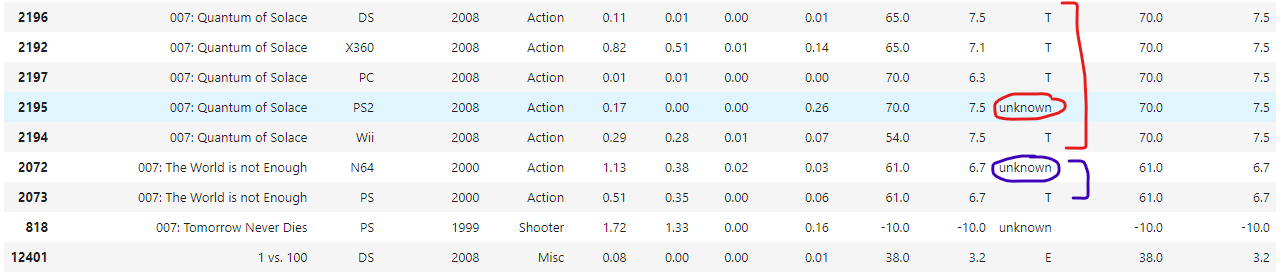

Есть игры, для которых опять же на одной платформе есть данные по рейтингу ESRB а на дрйгой нет. Но восстанавливать строковые данные представляется очень трудоемким. Так что просто оставим эти пропуски.

Пропуски в столбцах `year_of_release`,`name` и `genre` просто удалим. Первые в силу того что их не восстановить по другим данным, последние в силу того что их всего пару строк.
Но для начала перепроверим что в этих строках, и что по суммам продаж:

In [21]:
#Смотрим срез строк для удаления
games_query = games.query(
    'year_of_release.isna() or name.isna() or genre.isna()')

print (display(games_query))
games_query[['na_sales','eu_sales','jp_sales','other_sales']].describe()

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
183,Madden NFL 2004,PS2,<NA>,Sports,4.26,0.26,0.01,0.71,94.0,8.5,E
377,FIFA Soccer 2004,PS2,<NA>,Sports,0.59,2.36,0.04,0.51,84.0,6.4,E
456,LEGO Batman: The Videogame,Wii,<NA>,Action,1.80,0.97,0.00,0.29,74.0,7.9,E10+
475,wwe Smackdown vs. Raw 2006,PS2,<NA>,Fighting,1.57,1.02,0.00,0.41,-10.0,-10.0,unknown
609,Space Invaders,2600,<NA>,Shooter,2.36,0.14,0.00,0.03,-10.0,-10.0,unknown
...,...,...,...,...,...,...,...,...,...,...,...
16373,PDC World Championship Darts 2008,PSP,<NA>,Sports,0.01,0.00,0.00,0.00,43.0,-10.0,E10+
16405,Freaky Flyers,GC,<NA>,Racing,0.01,0.00,0.00,0.00,69.0,6.5,T
16448,Inversion,PC,<NA>,Shooter,0.01,0.00,0.00,0.00,59.0,6.7,M
16458,Hakuouki: Shinsengumi Kitan,PS3,<NA>,Adventure,0.01,0.00,0.00,0.00,-10.0,-10.0,unknown


None


,na_sales,eu_sales,jp_sales,other_sales
count,271.000000,271.000000,271.000000,271.000000
mean,0.224834,0.092214,0.024834,0.032066
std,0.434025,0.208947,0.089839,0.075347
min,0.000000,0.000000,0.000000,0.000000
25%,0.010000,0.000000,0.000000,0.000000
50%,0.090000,0.020000,0.000000,0.010000
75%,0.245000,0.100000,0.000000,0.030000
max,4.260000,2.360000,0.770000,0.710000


Убедившись, что мы не собираемся удалить игры, которые принесли очень большие продажи, перейдем непосредственно у удалению:

In [22]:
print ('Количество удаляемых строк = ', games_query.shape[0],'\n\n')

# Удаляем строки
games.drop(games_query.index, inplace = True)

#Обновим индексацию датафрейма
games.reset_index(drop=True, inplace= True)

#Проверяем
games.info()

Количество удаляемых строк =  271 


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16444 entries, 0 to 16443
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   name             16444 non-null  object 
 1   platform         16444 non-null  object 
 2   year_of_release  16444 non-null  Int64  
 3   genre            16444 non-null  object 
 4   na_sales         16444 non-null  float64
 5   eu_sales         16444 non-null  float64
 6   jp_sales         16444 non-null  float64
 7   other_sales      16444 non-null  float64
 8   critic_score     16444 non-null  float64
 9   user_score       16444 non-null  float64
 10  rating           16444 non-null  object 
dtypes: Int64(1), float64(6), object(4)
memory usage: 1.4+ MB


#### 2.5 Проверим наличие дубликатов в датафрейме

In [23]:
#Ищем дубликаты по всему датафрейму
games.duplicated().sum()

0

В датафрейме дубликатов строк не обнаружено

In [24]:
#Ищем дубликаты по параметрам
games[games.duplicated(['name', 'platform','year_of_release'])]

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
15969,Madden NFL 13,PS3,2012,Sports,0.0,0.01,0.0,0.0,83.0,5.5,E


Есть одна дублирующая строка

In [25]:
games.query('name == "Madden NFL 13"')

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
503,Madden NFL 13,X360,2012,Sports,2.53,0.15,0.0,0.17,81.0,5.8,E
600,Madden NFL 13,PS3,2012,Sports,2.11,0.22,0.0,0.23,83.0,5.5,E
3933,Madden NFL 13,Wii,2012,Sports,0.47,0.00,0.0,0.03,-10.0,7.3,E
5800,Madden NFL 13,PSV,2012,Sports,0.28,0.00,0.0,0.02,63.0,7.3,E
6956,Madden NFL 13,WiiU,2012,Sports,0.21,0.00,0.0,0.02,75.0,6.7,E
15969,Madden NFL 13,PS3,2012,Sports,0.00,0.01,0.0,0.00,83.0,5.5,E


удалим эту дублирующую строку:

In [26]:
games.drop(509, inplace = True)

#Обновим индексацию датафрейма
games.reset_index(drop=True, inplace= True)

#Проверяем
games.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16443 entries, 0 to 16442
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   name             16443 non-null  object 
 1   platform         16443 non-null  object 
 2   year_of_release  16443 non-null  Int64  
 3   genre            16443 non-null  object 
 4   na_sales         16443 non-null  float64
 5   eu_sales         16443 non-null  float64
 6   jp_sales         16443 non-null  float64
 7   other_sales      16443 non-null  float64
 8   critic_score     16443 non-null  float64
 9   user_score       16443 non-null  float64
 10  rating           16443 non-null  object 
dtypes: Int64(1), float64(6), object(4)
memory usage: 1.4+ MB


#### 2.6 Посчитаем суммарные продажи во всех регионах и запишем их в отдельный столбец

In [27]:
games['sales_sum'] = games[[
    'na_sales','eu_sales','jp_sales', 'other_sales']].sum(axis = 1)
                           
#Проверяем
games.sample(n=5)

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,sales_sum
10230,Yuusha no Kuse ni Namaikida Or 3D,PSP,2010,Strategy,0.00,0.00,0.11,0.00,-10.0,-10.0,unknown,0.11
9236,X-Blades,PS3,2009,Action,0.07,0.03,0.02,0.01,50.0,5.9,M,0.13
16293,Egg Mania: Eggstreme Madness,GC,2002,Puzzle,0.01,0.00,0.00,0.00,64.0,8.0,E,0.01
864,Star Wars: Dark Forces,PC,1994,Shooter,1.09,0.77,0.00,0.09,-10.0,-10.0,unknown,1.95
2257,Tiger Woods PGA Tour 2002,PS2,2002,Sports,0.44,0.35,0.00,0.12,80.0,7.6,E,0.91


In [28]:
#Проверяем
games.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16443 entries, 0 to 16442
Data columns (total 12 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   name             16443 non-null  object 
 1   platform         16443 non-null  object 
 2   year_of_release  16443 non-null  Int64  
 3   genre            16443 non-null  object 
 4   na_sales         16443 non-null  float64
 5   eu_sales         16443 non-null  float64
 6   jp_sales         16443 non-null  float64
 7   other_sales      16443 non-null  float64
 8   critic_score     16443 non-null  float64
 9   user_score       16443 non-null  float64
 10  rating           16443 non-null  object 
 11  sales_sum        16443 non-null  float64
dtypes: Int64(1), float64(7), object(4)
memory usage: 1.5+ MB



**Вывод по результатам выполнения раздела:**

В полученном датафрейме содержалась информация о 16715 играх, данные представлены за 1980-2016 годы.

В 6 столбцах были обнаружены пропуски: в столбце Critic_Score - 51.3%, столбцах Rating - 40.5% и User_Score - 40.1%, в остальных трех столбцах количество пропусков менее 1.6%. 
Пропуски в столбцах могут быть обусловлены какой-то ошибкой записи данных или их выгрузки. (только пару пропусков в имени и жанре может быть вызвана например и человеческим фактором).
  
Было произведено изменение типов столбцов `year_of_release` на целочисленный, так как год не может быть дробным, и `user_score` на численный, так как оценка пользователя является числовым значением. 

После обработки пропусков и необычных значений ('tbd') в датафрейме осталась информация о 16443 играх (это 98.4% от исходных данных).

Полностью дублирующих строк в датафрейме не было обнаружено. Была обнаружена одна строка дубликат по названию игры, платформе и году релиза, эта строка была удалена.

В датафрейм был посчитан и добавлен столбец `sales_sum`, cодержащий суммарные продажи игры во всех регионах.

<a id='section_3'></a>
### Шаг 3. Исследовательский анализ данных

#### 3.1 Посмотрим, сколько игр выпускалось в разные годы. Важны ли данные за все периоды

In [29]:
#Группируем таблицу по годам 
#и находим количество игр
games_in_years = games.pivot_table(
    index = 'year_of_release', 
    values = 'name', 
    aggfunc = 'count'
)

#Переименовываем столбцы
games_in_years.columns =['count_of_games']

games_in_years.sort_values(by=['count_of_games'])

,count_of_games
year_of_release,
1980,9
1984,14
1985,14
1988,15
1990,16
1987,16
1989,17
1983,17
1986,21


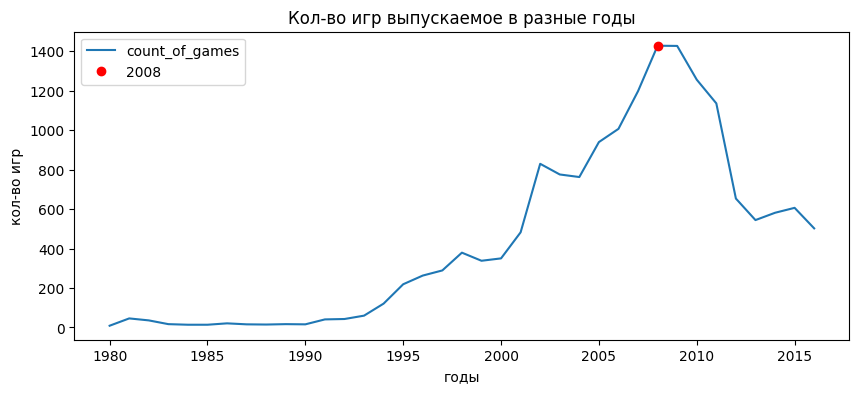

In [30]:
#Отрисовываем график
games_in_years.plot(figsize = (10,4))
plt.title('Кол-во игр выпускаемое в разные годы')
plt.ylabel('кол-во игр')
plt.xlabel('годы')

#Записываем год с макс значением выпущенных игр
year_with_max = games_in_years.sort_values(
    by ='count_of_games'
).index[-1]

#Добавляем на график это макс значение
#И добавляем подписи
plt.plot(
    year_with_max, 
    games_in_years.max(), 
    'ro', 
    label = year_with_max)
plt.legend();

Видно что до 2001 года выпускалось сравнительно мало игр (до 400), а с 2001 года идет резкий скачок по количеству выпускаемых игр, который достигает своего пика к 2009году (1427 игр). После 2009 года количество выпускаемых игр идет на спад.

#### 3.2 Посмотрим, как менялись продажи по платформам

Выберем платформы с наибольшими суммарными продажами и построим распределение по годам

In [31]:
#Группируем таблицу по платформам и по годам
#находим суммарные продажи для каждого года
platform_sales= games.groupby(['platform','year_of_release']).agg(
    {'sales_sum':['sum']}
)

#Переименовываем столбец
platform_sales.columns = ['sales_sum_in_year']


Найдем суммарные продажи за все года по каждой платформе и отобразим на графике:

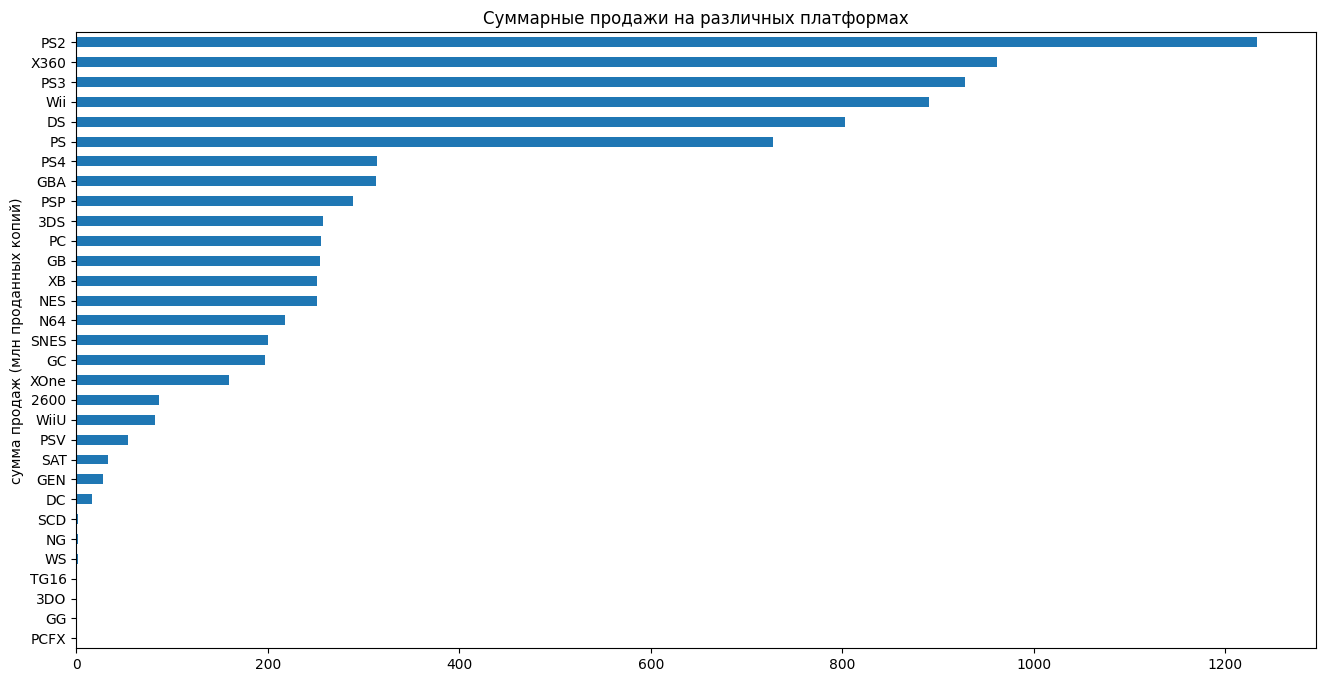

In [32]:
#продажи за все года по каждой платформе
platform_sales_all_years = platform_sales.groupby(
    level=['platform']
)['sales_sum_in_year'].sum().sort_values()

#Сортируем и выводим на график от самых дорогих к дешевым
platform_sales_all_years.plot(
    title = 'Суммарные продажи на различных платформах',
    ylabel = 'платформы',
    xlabel = 'сумма продаж (млн проданных копий)',
    figsize=(16,8),
    legend = False,
    kind = 'barh');

Топ 6 платформ с наибольшими продажами это PS2, X360, PS3, PS, DS и Wii. Построим для них распределение продаж по годам.

In [33]:
target_platform = platform_sales_all_years.tail(6).index
target_platform

Index(['PS', 'DS', 'Wii', 'PS3', 'X360', 'PS2'], dtype='object', name='platform')

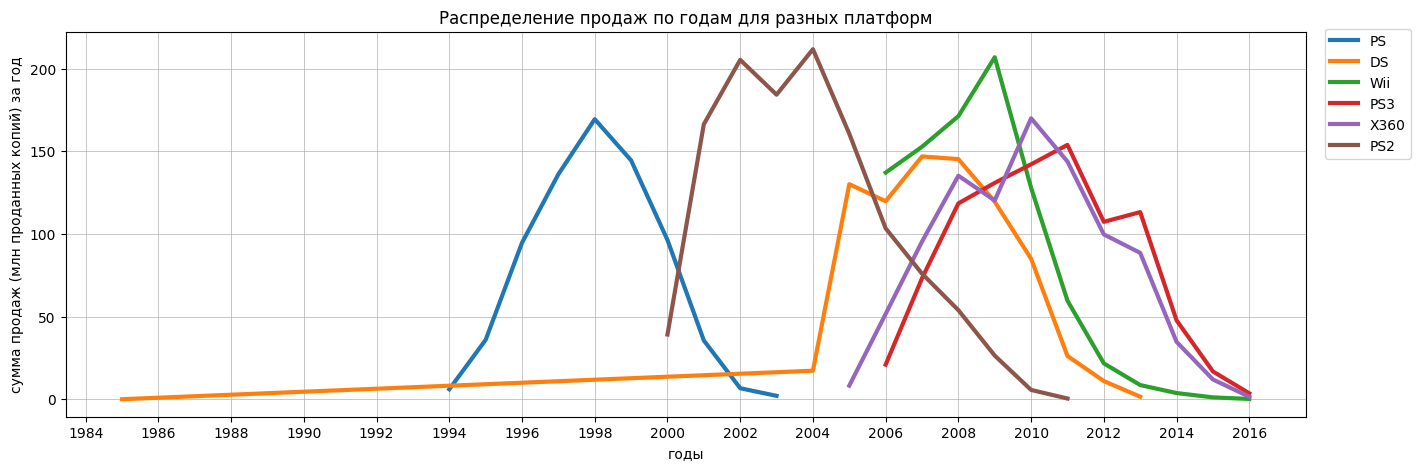

In [34]:
#Настраиваем отображение графиков на одном плоте и подписи
fig,ax = plt.subplots(figsize=(16, 5))
ax.set_title(
    'Распределение продаж по годам для разных платформ'
)
ax.set_ylabel('сумма продаж (млн проданных копий) за год')
ax.set_xlabel('годы')

#Перебираем эти 6 платформ, и строим для каждой график по годам
for platform in target_platform:
    platform_data = platform_sales.loc[(platform, )]
    ax.plot(
        platform_data.index.to_numpy(), 
        platform_data['sales_sum_in_year'],
        label=platform,
        linewidth=3
    )
    
#Расположение легенды
# fig.legend( loc='outside upper right', bbox_to_anchor=(0.97, 0.9)) 

# чуть поправил код, под старую версию библиотеки
fig.legend( loc='upper right', bbox_to_anchor=(0.97, 0.9))

#Изменяем частоту надписей на оси Х    
ax.xaxis.set_major_locator(ticker.MultipleLocator(2))
#Задаем координатную сетку
ax.grid(visible=True,linewidth=0.5)

Можно заметить что в среднем цикл жизни платформы составляет примерно 8 лет. На примере PS мы видим что новая версия платформ появлялась через каждые 6-7лет.

Самой прибыльной за все годы стала платформа PS2.

Также заметен странный выброс 1985 года у DS. Гугл говорит нам что первые DS появились в 2004 году, посмотрим что это за более ранние данные и сколько их:

In [35]:
games.loc[
    (games['year_of_release'] < 2004) 
    & 
    (games['platform'] == 'DS')
]

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,sales_sum
15703,Strongest Tokyo University Shogi DS,DS,1985,Action,0.0,0.0,0.02,0.0,-10.0,-10.0,unknown,0.02


In [36]:
games.query('platform=="DS"')['year_of_release'].value_counts()

2008    492
2009    403
2007    376
2010    323
2006    201
2011    153
2005    118
2004     23
2012     23
2013      8
1985      1
Name: year_of_release, dtype: Int64

Всего одна строка, где у DS указан 1985г, что похоже на ошибку, поэтому удалим эту ошибочную/аномальную строку:  

In [37]:
games.drop(15902, inplace = True)

#Обновим индексацию датафрейма
games.reset_index(drop=True, inplace= True)

#Проверяем
games.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16442 entries, 0 to 16441
Data columns (total 12 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   name             16442 non-null  object 
 1   platform         16442 non-null  object 
 2   year_of_release  16442 non-null  Int64  
 3   genre            16442 non-null  object 
 4   na_sales         16442 non-null  float64
 5   eu_sales         16442 non-null  float64
 6   jp_sales         16442 non-null  float64
 7   other_sales      16442 non-null  float64
 8   critic_score     16442 non-null  float64
 9   user_score       16442 non-null  float64
 10  rating           16442 non-null  object 
 11  sales_sum        16442 non-null  float64
dtypes: Int64(1), float64(7), object(4)
memory usage: 1.5+ MB


#### 3.3 Учитывая вышеприведенный анализ, для прогноза успешности игр на 2017 г., будем считать актуальным периодом данных 2009 - 2016 год. Составим новый датафрейм с данными за этот период.

In [38]:
games_actual = games.loc[games['year_of_release'] >=2009]

#Проверяем
games_actual['year_of_release'].sort_values().unique()

<IntegerArray>
[2009, 2010, 2011, 2012, 2013, 2014, 2015, 2016]
Length: 8, dtype: Int64

In [39]:
print(f'Процент исключаемых из анализа данных = \
{1-(games_actual.shape[0]/games.shape[0]):.1%}')

Процент исключаемых из анализа данных = 59.2%


#### 3.4 Посмотрим какие платформы лидируют по продажам, растут или падают для нашего периода. Выберем несколько потенциально прибыльных платформ.

In [40]:
#Группируем таблицу по платформам и по годам
#находим суммарные продажи для каждого года
platform_sales = games_actual.groupby(['platform','year_of_release']).agg(
    {'sales_sum':['sum']}
)

#Переименовываем столбец
platform_sales.columns = ['sales_sum_in_year']


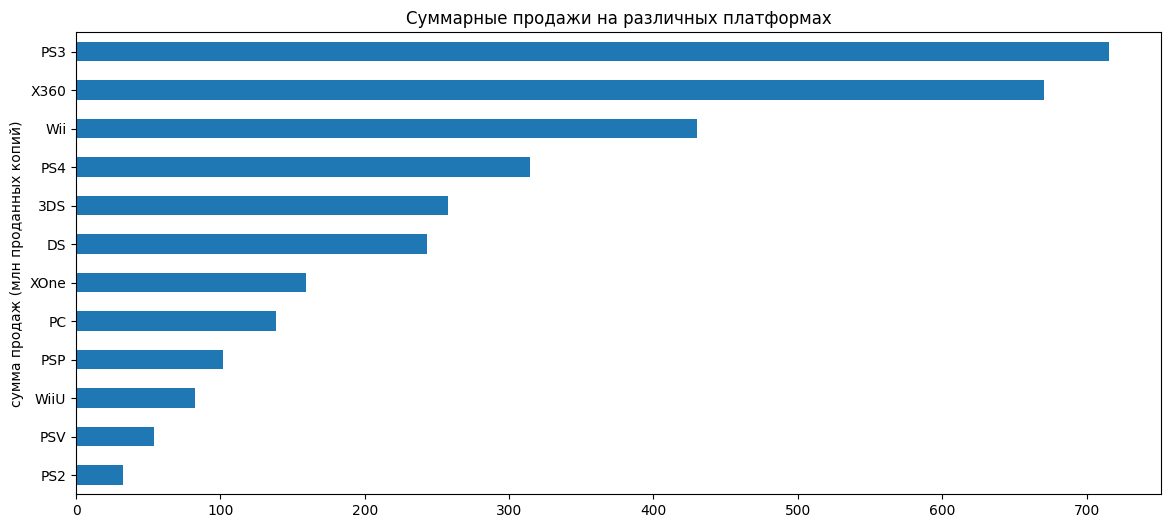

In [41]:
#продажи за все года по каждой платформе
platform_sales_all_years = platform_sales.groupby(
    level=['platform']
)['sales_sum_in_year'].sum().sort_values()

#Сортируем и выводим на график от самых дорогих к дешевым
platform_sales_all_years.plot(
    title = 'Суммарные продажи на различных платформах',
    ylabel = 'платформы',
    xlabel = 'сумма продаж (млн проданных копий)',
    figsize=(14,6),
    legend = False,
    kind = 'barh');

По суммарной выручке за весь период 2009-2016г есть три лидирующих платформы - X360, PS3, Wii. 

Но, давайте посмотрим как меняются продажи по годам для всех платформ:

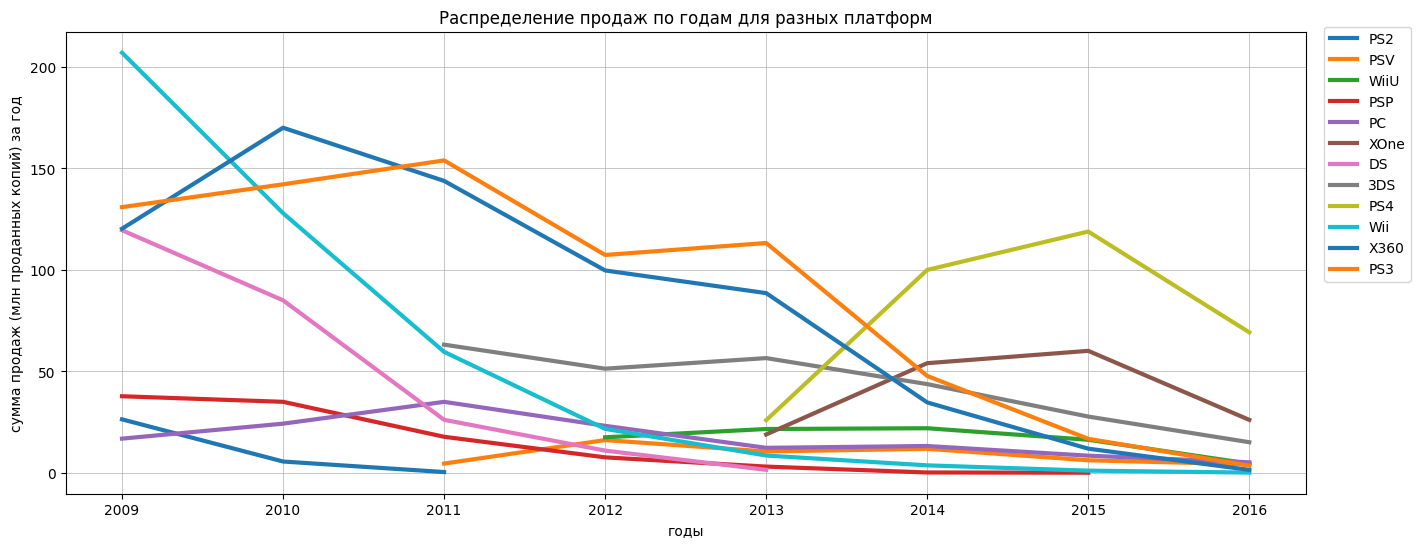

In [42]:
#Настраиваем отображение графиков на одном плоте и подписи
fig,ax = plt.subplots(figsize=(16, 6))
ax.set_title(
    'Распределение продаж по годам для разных платформ'
)
ax.set_ylabel('сумма продаж (млн проданных копий) за год')
ax.set_xlabel('годы')

#Перебираем платформы, и строим для каждой график по годам
for platform in platform_sales_all_years.index:
    platform_data = platform_sales.loc[(platform, )]
    ax.plot(
        platform_data.index.to_numpy(), 
        platform_data['sales_sum_in_year'],
        label=platform,
        linewidth=3
    )

#Расположение легенды
# fig.legend( loc='outside upper right', bbox_to_anchor=(0.97, 0.9))    

# чуть поправил код, под старую версию библиотеки
fig.legend( loc='upper right', bbox_to_anchor=(0.97, 0.9))

#Изменяем частоту надписей на оси Х    
ax.xaxis.set_major_locator(ticker.MultipleLocator(1))
#Задаем координатную сетку
ax.grid(visible=True,linewidth=0.5)

Для большинства платформ виден упадок к 2014-2016 годам, кроме двух (PS4 и XOne), на которых наблюдается рост. 
Однако данные за 2016г могут быть неполными, посмотрим поближе данные за 2014-2015г:

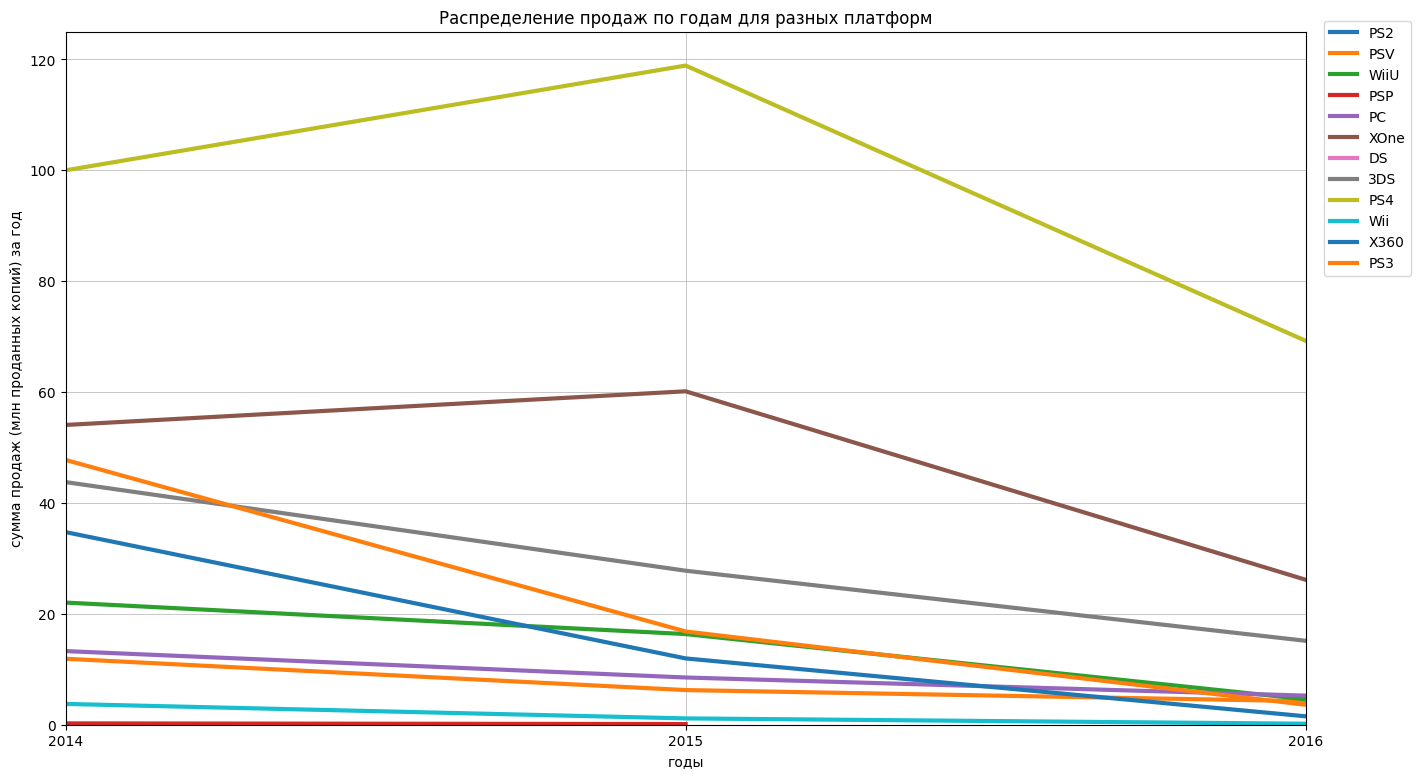

In [43]:
#Настраиваем отображение графиков на одном плоте и подписи
fig,ax = plt.subplots(figsize=(16, 9))
ax.set_title(
    'Распределение продаж по годам для разных платформ'
)
ax.set_ylabel('сумма продаж (млн проданных копий) за год')
ax.set_xlabel('годы')

#Перебираем платформы, и строим для каждой график по годам
for platform in platform_sales_all_years.index:
    platform_data = platform_sales.loc[(platform, )]
    ax.plot(
        platform_data.index.to_numpy(), 
        platform_data['sales_sum_in_year'],
        label=platform,
        linewidth=3
    )
    plt.xlim(2014,2016)
    plt.ylim(0,125)

#Расположение легенды
# fig.legend( loc='outside upper right', bbox_to_anchor=(0.97, 0.89))

# чуть поправил код, под старую версию библиотеки
fig.legend( loc='upper right', bbox_to_anchor=(0.97, 0.9))

#Изменяем частоту надписей на оси Х    
ax.xaxis.set_major_locator(ticker.MultipleLocator(1))
#Задаем координатную сетку
ax.grid(visible=True,linewidth=0.5)

При более близком рассмотрении в период 2014-2015г также наблюдается рост продаж только у двух платформ - PS4, XOne, у остальных платформ идет снижение продаж в той или иной степени. Данные две платформы можно считать потенциально прибыльными на 2017 г. 

И, исходя из графика продажи, и учитывая динамично изменяющуюся индустрию игр, можно актуальным периодом для прогнозирования продаж на 2017г взять данные с 2014 по 2016г. 

Изменим наш датафрейм, сотавив данные с 2014 года.

In [44]:
games_actual2 = games_actual.loc[games['year_of_release'] >=2014]

#Проверяем
games_actual2['year_of_release'].sort_values().unique()

<IntegerArray>
[2014, 2015, 2016]
Length: 3, dtype: Int64

In [45]:
#Группируем таблицу по платформам и по годам
#находим суммарные продажи для каждого года
platform_sales2 = games_actual2.groupby(['platform','year_of_release']).agg(
    {'sales_sum':['sum']}
)

#Переименовываем столбец
platform_sales2.columns = ['sales_sum_in_year']

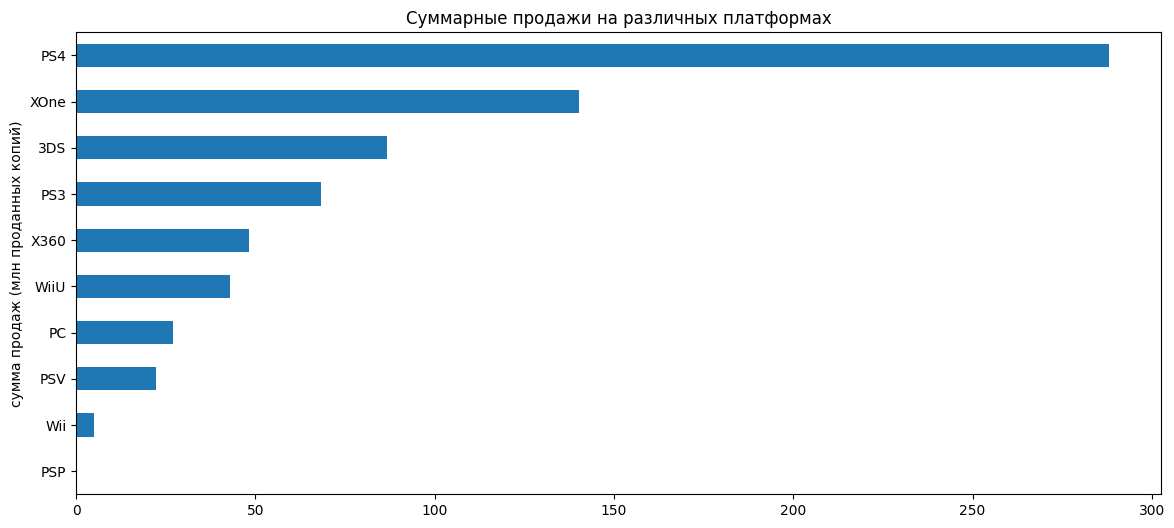

In [46]:
#продажи за все года по каждой платформе
platform_sales_all_years2 = platform_sales2.groupby(
    level=['platform']
)['sales_sum_in_year'].sum().sort_values()

#Сортируем и выводим на график от самых дорогих к дешевым
platform_sales_all_years2.plot(
    title = 'Суммарные продажи на различных платформах',
    ylabel = 'платформы',
    xlabel = 'сумма продаж (млн проданных копий)',
    figsize=(14,6),
    legend = False,
    kind = 'barh');

In [47]:
platform_sales_all_years2

platform
PSP       0.36
Wii       5.07
PSV      22.40
PC       27.05
WiiU     42.98
X360     48.22
PS3      68.18
3DS      86.68
XOne    140.36
PS4     288.15
Name: sales_sum_in_year, dtype: float64

Теперь и картина другая. По суммарной выручке за период 2014-2016г среди лидирующих платформы - PS4, XOne и 3DS. 

Теперь заново посмотрим как меняются продажи по годам для платформ:

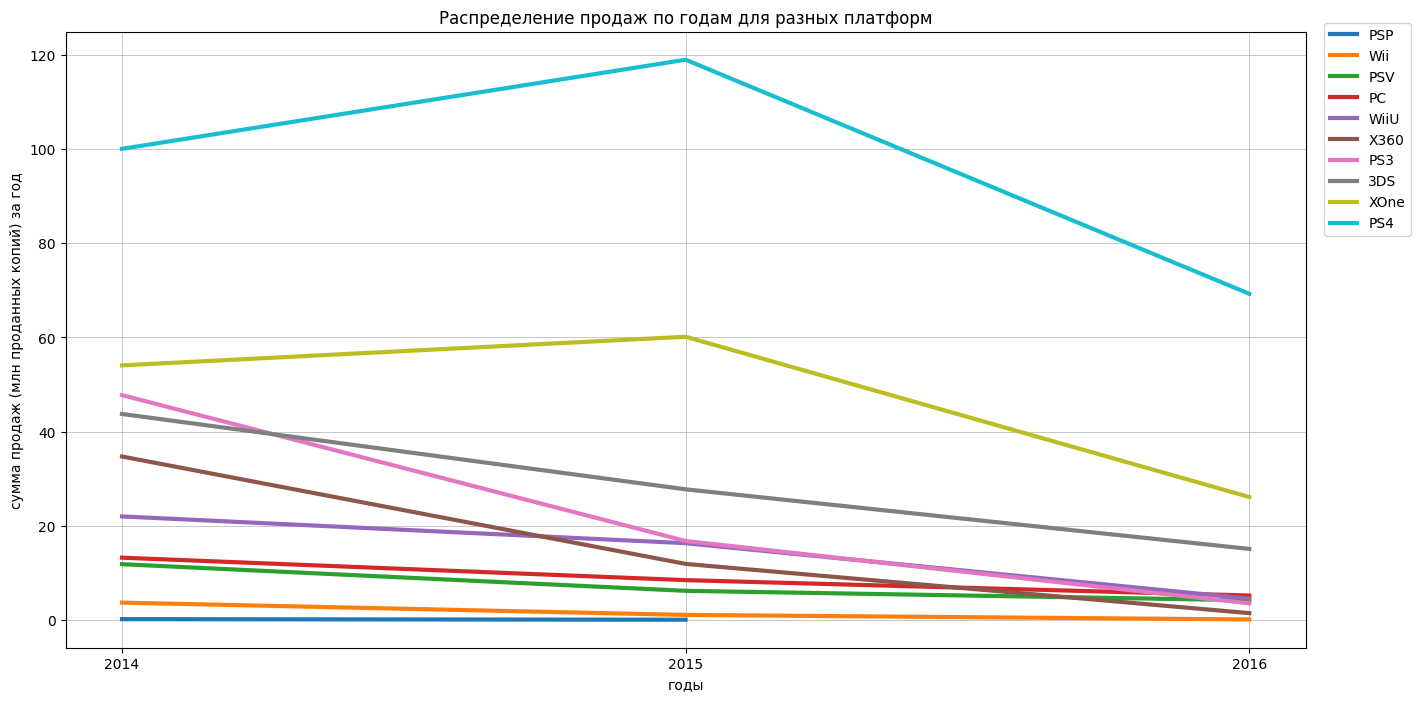

In [48]:
#Настраиваем отображение графиков на одном плоте и подписи
fig,ax = plt.subplots(figsize=(16, 8))
ax.set_title(
    'Распределение продаж по годам для разных платформ'
)
ax.set_ylabel('сумма продаж (млн проданных копий) за год')
ax.set_xlabel('годы')

#Перебираем платформы, и строим для каждой график по годам
for platform in platform_sales_all_years2.index:
    platform_data = platform_sales2.loc[(platform, )]
    ax.plot(
        platform_data.index.to_numpy(), 
        platform_data['sales_sum_in_year'],
        label=platform,
        linewidth=3
    )

# fig.legend( loc='outside upper right', bbox_to_anchor=(0.97, 0.89))

# чуть поправил код, под старую версию библиотеки
fig.legend( loc='upper right', bbox_to_anchor=(0.97, 0.9))

#Изменяем частоту надписей на оси Х    
ax.xaxis.set_major_locator(ticker.MultipleLocator(1))
#Задаем координатную сетку
ax.grid(visible=True,linewidth=0.5)

По-прежнему потенциально прибыльными можно считать только две платформы - PS4 и XOne. По платформе 3DS - хотя у нее и неплохая суммарная выручка, но мы видим тенденцию к падению продаж, поэтому не будем включать ее в список потенциально прибыльных платформ

#### 3.5 Построим диаграмму размаха по глобальным продажам игр в разбивке по платформам

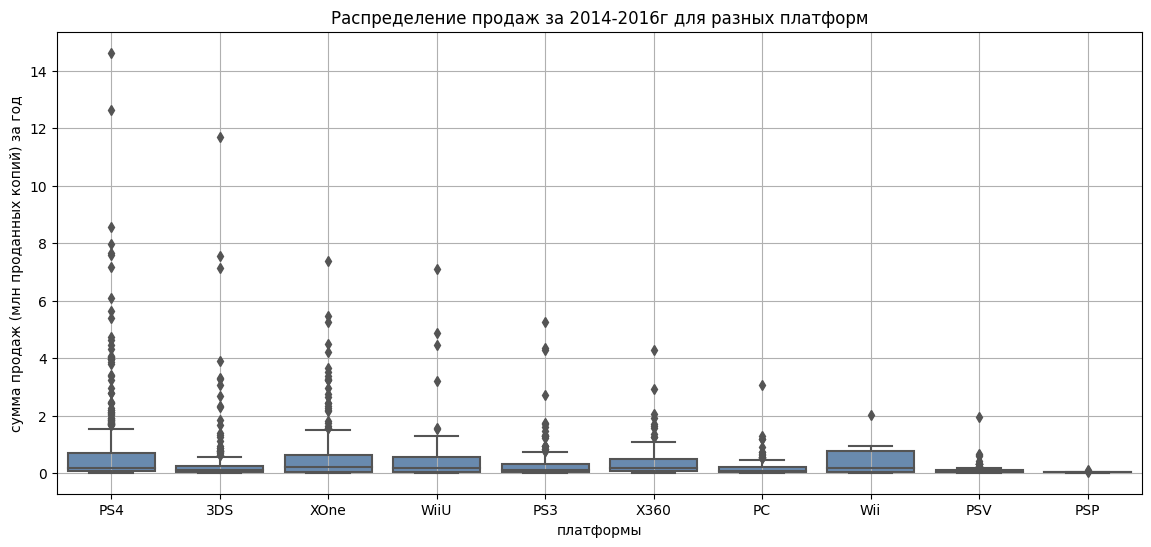

In [49]:
# построим общую диаграмму размаха
plt.figure(figsize=(14,6))
ax = sns.boxplot(
    x = games_actual2['platform'], 
    y = games_actual2['sales_sum'],
    color = '#5d89ba')
plt.title('Распределение продаж за 2014-2016г для разных платформ')
plt.xlabel('платформы')
plt.ylabel('сумма продаж (млн проданных копий) за год')
ax.yaxis.grid(True)
ax.xaxis.grid(True);

Платформы с самыми большими выбросами PS4 и 3DS. Отмасштабируем, посмотрим поближе:

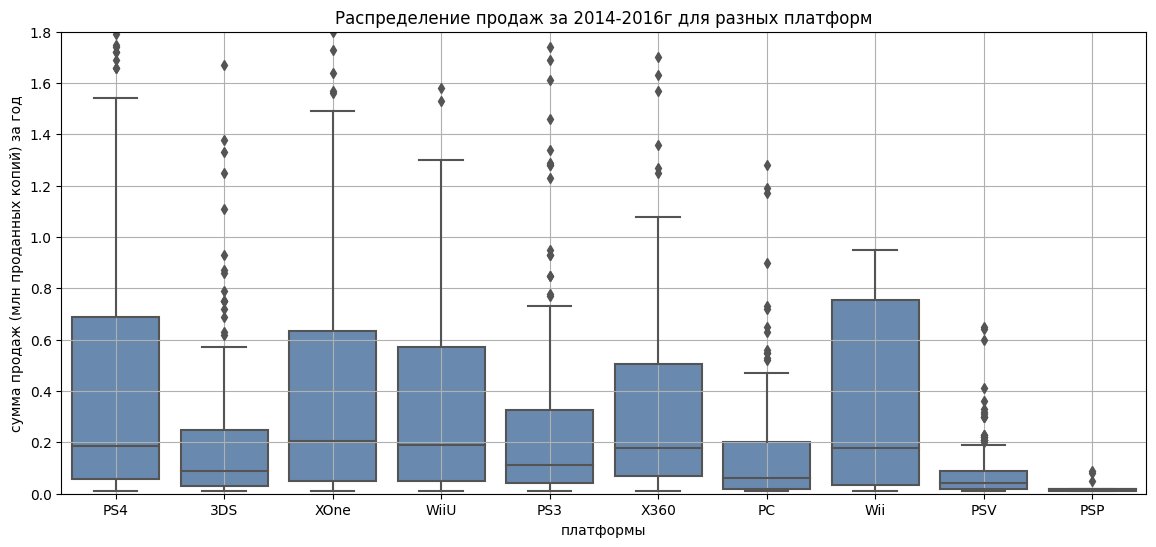

In [50]:
plt.figure(figsize=(14,6))
ax = sns.boxplot(
    x = games_actual2['platform'], 
    y = games_actual2['sales_sum'],
    color = '#5d89ba')
plt.title('Распределение продаж за 2014-2016г для разных платформ')
plt.xlabel('платформы')
plt.ylabel('сумма продаж (млн проданных копий) за год')
plt.ylim(0, 1.8)
ax.yaxis.grid(True)
ax.xaxis.grid(True);

По диафграмме размаха также видны лидирующие в 2014-2016г платформы с самыми дорогими продажами - PS4 и XOne. Но интересно что по медианам продаж многие платформы плюс минус на одном уровне (PS4, Wii, WiiU, XOne и X360).

#### 3.5 Посмотрим, как влияют на продажи внутри одной популярной платформы отзывы пользователей и критиков (возьмем например XOne)

Коэффициент корреляции = 0.26


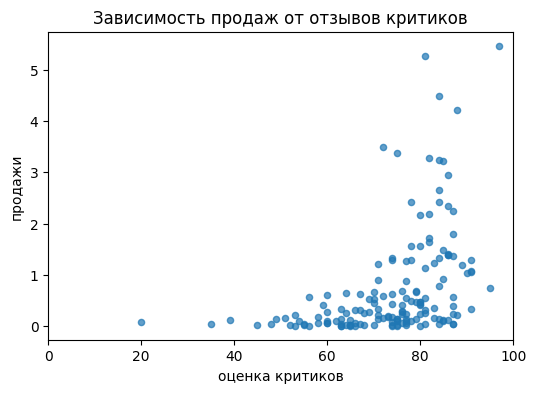

In [51]:
platform_XOne = games_actual2.query('platform == "XOne"')

platform_XOne.query('critic_score!=-10').plot(
    title = 'Зависимость продаж от отзывов критиков',
    x='critic_score', 
    xlabel='оценка критиков',
    y='sales_sum', 
    ylabel='продажи',
    kind='scatter', 
    figsize=(6, 4),
    xlim = (0,100),
    alpha = 0.7, 
);
#Коэф корреляции Пирсона 
print('Коэффициент корреляции = {:.2f}'.format(
    platform_XOne['critic_score'].corr(platform_XOne['sales_sum'])))



На графике есть намек на очень слабую прямую связь между оценками критиков и продажами. Учитывая коэффициент Пирсона = 0.16, можно заключить что прямой корреляции между этими двумя величинами нет (очень слабая корреляция).

Коэффициент корреляции = 0.12


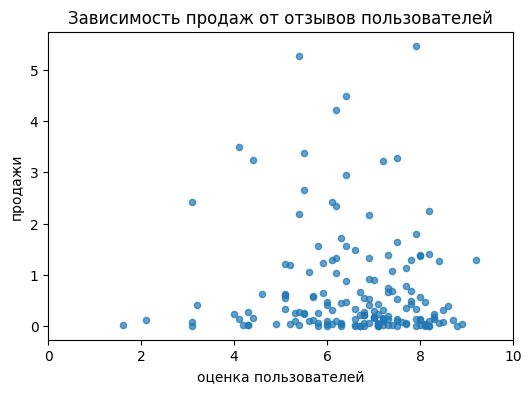

In [52]:
platform_XOne.query('user_score!=-10').plot(
    title = 'Зависимость продаж от отзывов пользователей',
    x='user_score', 
    xlabel='оценка пользователей',
    y='sales_sum', 
    ylabel='продажи',
    kind='scatter', 
    figsize=(6, 4),
    xlim = (0,10),
    alpha = 0.7,  
);
#Коэф корреляции Пирсона 
print('Коэффициент корреляции = {:.2f}'.format(
      platform_XOne['user_score'].corr(platform_XOne['sales_sum'])))

In [53]:
platform_XOne['user_score']

99      -10.0
165       7.9
179       5.4
241       6.4
269       6.2
         ... 
16357     8.2
16370     6.6
16372   -10.0
16387     6.7
16399   -10.0
Name: user_score, Length: 228, dtype: float64

Учитывая диграмму рассеяния и коэффициент Пирсона, можно заключить что корреляции между оценками пользователей и продажами нет.

Посмотрим есть ли корреляция между отзывами и продажами для других платформ:

In [54]:
def correlation(data, platform):
    """
    Ф-ия для расчета корреляции 
    отзывов пользователей и критиков с продажами
    """
    try:
        cov_critic = data.query(
            'critic_score!=-10'
        )['critic_score'].corr(data['sales_sum'])
        
        cov_user = data.query(
            'user_score!=-10'
        )['user_score'].corr(data['sales_sum'])
        
    except:
        pass
    
    print ('Платформа',platform)
    print('Коэффициент корреляции отзывов критиков и продаж = {:.2f}'.
          format(cov_critic))
    print('Коэффициент корреляции отзывов пользователей и продаж = {:.2f}'.
          format(cov_user),'\n')

    

In [55]:
platform_list = games_actual2['platform'].unique()

for platform in platform_list:
        correlation(games_actual2.query('platform == @platform'),platform)

Платформа PS4
Коэффициент корреляции отзывов критиков и продаж = 0.40
Коэффициент корреляции отзывов пользователей и продаж = -0.04 

Платформа 3DS
Коэффициент корреляции отзывов критиков и продаж = 0.31
Коэффициент корреляции отзывов пользователей и продаж = 0.22 

Платформа XOne
Коэффициент корреляции отзывов критиков и продаж = 0.43
Коэффициент корреляции отзывов пользователей и продаж = -0.07 

Платформа WiiU
Коэффициент корреляции отзывов критиков и продаж = 0.37
Коэффициент корреляции отзывов пользователей и продаж = 0.41 

Платформа PS3
Коэффициент корреляции отзывов критиков и продаж = 0.45
Коэффициент корреляции отзывов пользователей и продаж = -0.17 

Платформа X360
Коэффициент корреляции отзывов критиков и продаж = 0.53
Коэффициент корреляции отзывов пользователей и продаж = -0.14 

Платформа PC
Коэффициент корреляции отзывов критиков и продаж = 0.17
Коэффициент корреляции отзывов пользователей и продаж = -0.07 

Платформа Wii
Коэффициент корреляции отзывов критиков и продаж

На других платформах в целом существует также некоторая связь (слабая) между отзывами критиков и продажами игр.

Связи между отзывами пользователей и продажами игр нет, кроме платформы WiiU (где слабая связь, коэф. корреляции = 0.38) и платформы Wii(где есть прямая связь, коэф. корреляции = 0.65)

Посмотрим почему появилась ошибка деления на ноль и ошибка среза при расчете для платформы PSP:

In [56]:
games_actual2.query('platform == "PSP"')

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,sales_sum
10933,Pro Yaky? Spirits 2014,PSP,2014,Sports,0.0,0.0,0.09,0.0,-10.0,-10.0,unknown,0.09
11307,Uta no Prince-Sama: All Star After Secret,PSP,2015,Action,0.0,0.0,0.08,0.0,-10.0,-10.0,unknown,0.08
13240,Toukiden Kiwami,PSP,2014,Action,0.0,0.0,0.05,0.0,-10.0,-10.0,unknown,0.05
14786,Juusanshi Engi Engetsu Sangokuden 2,PSP,2014,Action,0.0,0.0,0.02,0.0,-10.0,-10.0,unknown,0.02
15262,Gakuen K: Wonderful School Days,PSP,2014,Adventure,0.0,0.0,0.02,0.0,-10.0,-10.0,unknown,0.02
15741,Harukanaru Toki no Naka de 6,PSP,2015,Action,0.0,0.0,0.02,0.0,-10.0,-10.0,unknown,0.02
15811,Meiji Toukyou Renka: Twilight Kiss,PSP,2015,Action,0.0,0.0,0.02,0.0,-10.0,-10.0,unknown,0.02
15869,Shinobi Koutsutsu,PSP,2014,Adventure,0.0,0.0,0.01,0.0,-10.0,-10.0,unknown,0.01
15970,Geten no Hana: Yume Akari,PSP,2014,Misc,0.0,0.0,0.01,0.0,-10.0,-10.0,unknown,0.01
16047,Bakumatsu Rock,PSP,2014,Action,0.0,0.0,0.01,0.0,-10.0,-10.0,unknown,0.01


Я так понимаю из-за того что тут только один элемент получается, когда исключаем заглушки.

#### 3.6 Посмотрим на общее распределение игр по жанрам

In [57]:
#Группируем таблицу по жанрам и играм
#находим суммарные продажи для каждой игры
genre_sales = games_actual2.groupby(['genre','name']).agg(
    {'sales_sum':['sum'],}
)

#Переименовываем столбец
genre_sales.columns = ['sales_sum_in_genre']

#Проверяем 
genre_sales

sales_sum_in_genre
genre    name                                                                  
Action   3rd Super Robot Wars Z: Tengoku-Hen                               0.34
         7 Days to Die                                                     0.19
         A Good Librarian Like a Good Shepherd: Library ...                0.03
         Abunai: Koi no Sousa Shitsu                                       0.02
         Adventure Time: Finn & Jake Investigations                        0.46
...                                                                         ...
Strategy Total War Attila: Tyrants & Kings                                 0.01
         Total War: Attila                                                 0.24
         Total War: WARHAMMER                                              0.13
         War for the Overworld                                             0.01
         XCOM 2                                                            0.41

[956 rows x 1 columns]

In [58]:
#Количество игр в каждом жанре
count_games_in_genre = genre_sales.groupby(
    level=['genre']
)['sales_sum_in_genre'].count().sort_values()

count_games_in_genre.name = 'count_games_in_genre'

count_games_in_genre.to_frame()

,count_games_in_genre
genre,
Puzzle,10
Platform,22
Racing,28
Strategy,32
Fighting,34
Simulation,35
Shooter,51
Sports,55
Misc,73


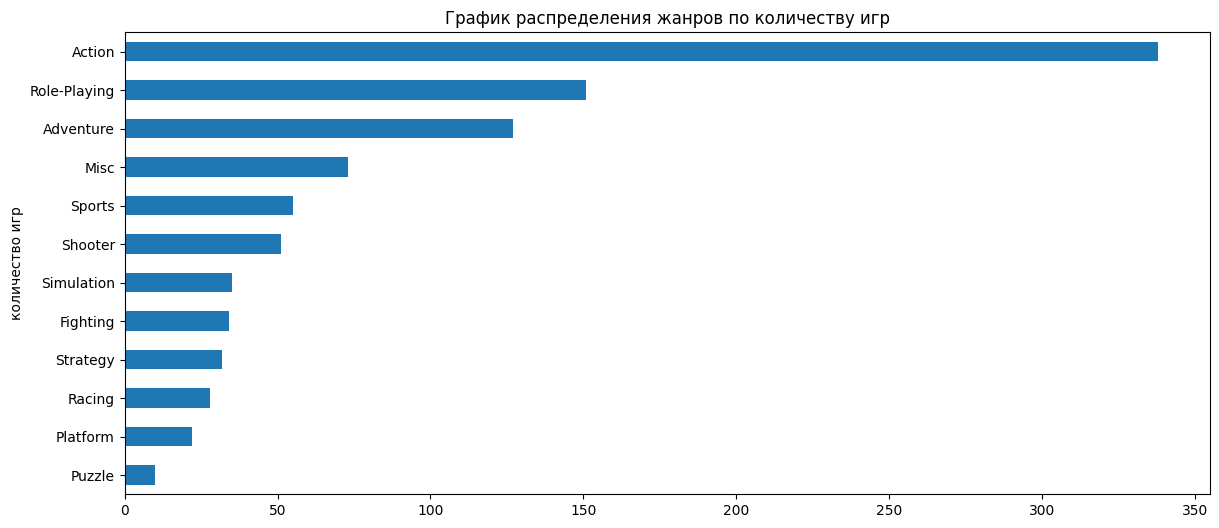

In [59]:
#Сортируем и выводим на график
count_games_in_genre.plot(
    title = 'График распределения жанров по количеству игр',
    ylabel = 'жанры',
    xlabel = 'количество игр',
    figsize=(14,6),
    legend = False,
    kind = 'barh');

Больше всего игр выпускается в жанрах Action, Role-Playing и Adventure. Меньше всего выпускается игр в жанре Puzzle, Platform и Racing. 

Оценим теперь прибыльность игр в каждом жанре:

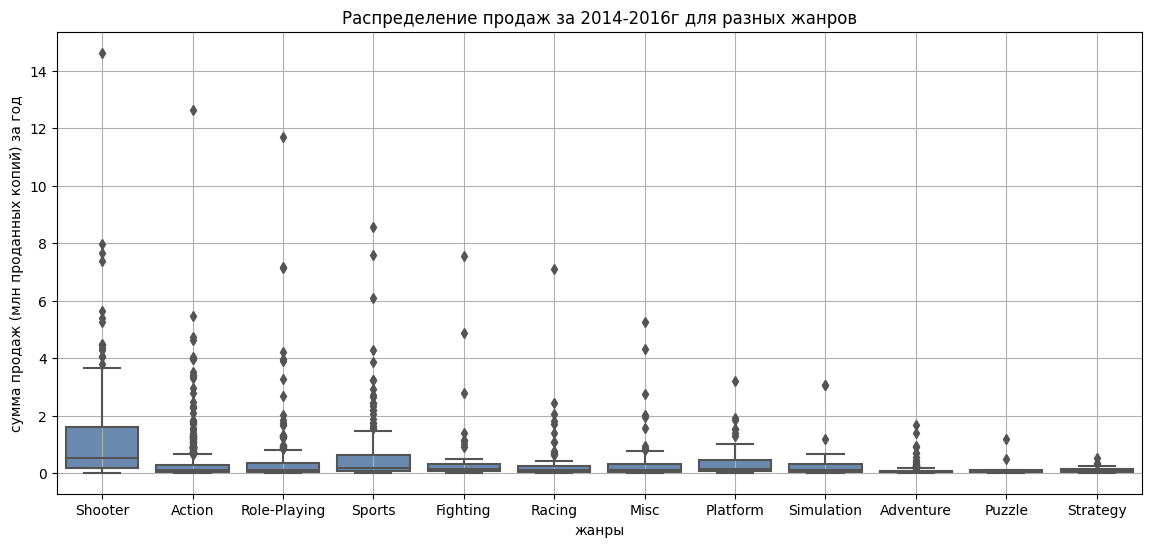

In [60]:
# построим общую диаграмму размаха
plt.figure(figsize=(14,6))
ax = sns.boxplot(
    x = games_actual2['genre'], 
    y = games_actual2['sales_sum'], 
    color = '#5d89ba')
plt.title('Распределение продаж за 2014-2016г для разных жанров')
plt.xlabel('жанры')
plt.ylabel('сумма продаж (млн проданных копий) за год')
ax.yaxis.grid(True)
ax.xaxis.grid(True);

По диаграмме размаха видно что самый прибыльный жанр Shooter, и у него же самый большие выбросы. Откорректируем масштаб, чтобы посмотреть без выбросов:

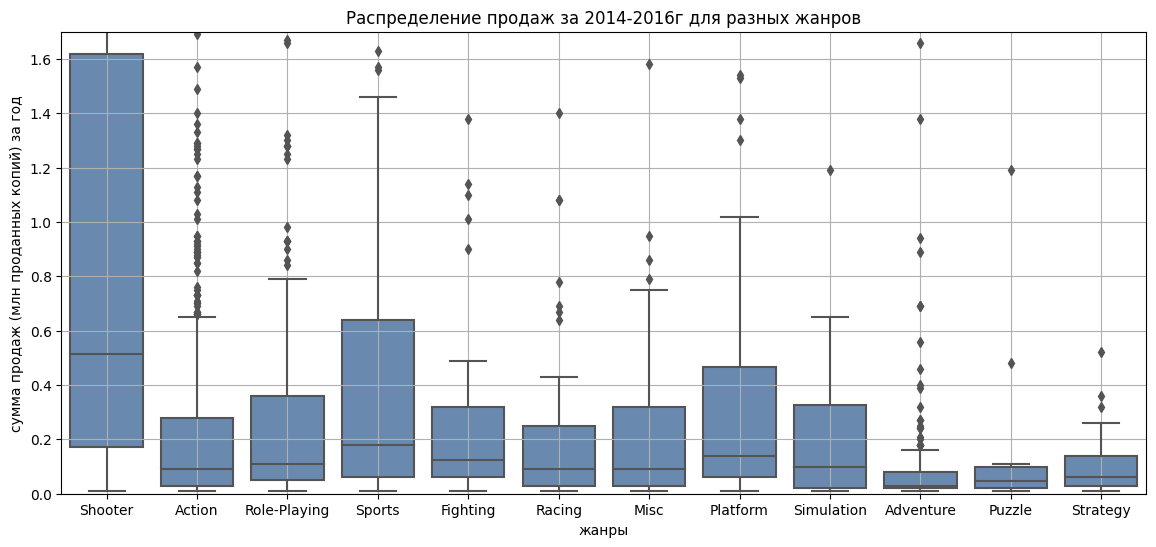

In [61]:
plt.figure(figsize=(14,6))
ax = sns.boxplot(
    x = games_actual2['genre'], 
    y = games_actual2['sales_sum'], 
    color = '#5d89ba')
plt.title('Распределение продаж за 2014-2016г для разных жанров')
plt.xlabel('жанры')
plt.ylabel('сумма продаж (млн проданных копий) за год')
plt.ylim(0, 1.7)
ax.yaxis.grid(True)
ax.xaxis.grid(True);

Самую большую прибыль приносят игры в жанре Shooter и Sports. Далее по прибыльности и ряду успешно продающихся игр следует жанр Platform и Role-Playing.

Наименьшую прибыль приносят жанры Adventure и Puzzle.

<a id='section_4'></a>
### Шаг 4. Составим портрет пользователя каждого региона

#### 4.1 Определим для пользователя каждого региона (NA, EU, JP) самые популярные платформы (топ-5)


In [62]:
#находим суммарные продажи для каждой платформы
#в каждом регионе
platforms_in_regions = games_actual2.groupby('platform').agg(
    {
        'na_sales':['sum'],
        'eu_sales':['sum'],
        'jp_sales':['sum']
    
    }
)

#Переименовываем столбцы
platforms_in_regions.columns = ['na_sales','eu_sales','jp_sales']

In [63]:
#Формируем три таблицы с данными топ-5 плафторм 
#и остальными просуммированными в категорию "другие"

platforms_in_regions = platforms_in_regions.sort_values(
    by = 'na_sales', ascending = False)
na_data = platforms_in_regions[:5].copy()
del na_data['eu_sales']
del na_data['jp_sales']
na_data.loc['others'] = platforms_in_regions['na_sales'][5:].sum()

platforms_in_regions = platforms_in_regions.sort_values(
    by = 'eu_sales', ascending = False)
eu_data = platforms_in_regions[:5].copy()
del eu_data['na_sales']
del eu_data['jp_sales']
eu_data.loc['others'] = platforms_in_regions['eu_sales'][5:].sum()

platforms_in_regions = platforms_in_regions.sort_values(
    by = 'jp_sales', ascending = False)
jp_data = platforms_in_regions[:5].copy()
del jp_data['na_sales']
del jp_data['eu_sales']
jp_data.loc['others'] = platforms_in_regions['jp_sales'][5:].sum()

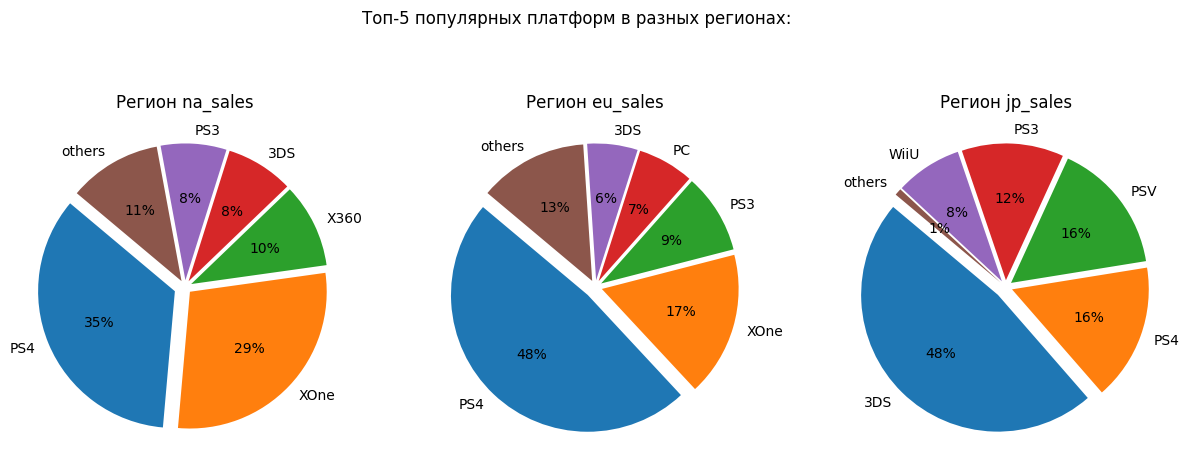

In [64]:
#Отрисовываем
fig, axs = plt.subplots(nrows=1, ncols=3, figsize=(15,5))
fig.suptitle('Топ-5 популярных платформ в разных регионах:', y=1.05)

explode = (0.08, 0.05, 0.05, 0.05, 0.05, 0.05)

na_data.plot(
    kind = 'pie',
    ax = axs[0],
    autopct='%1.0f%%',
    explode=explode,
    subplots=True,
    legend = False,
    startangle=140
    );
axs[0].set_ylabel('')
axs[0].set_title('Регион na_sales')

eu_data.plot(
    kind = 'pie',
    ax = axs[1],
    autopct='%1.0f%%',
    explode=explode,
    subplots=True,
    legend = False,
    startangle=140
    );
axs[1].set_ylabel('')
axs[1].set_title('Регион eu_sales')

jp_data.plot(
    kind = 'pie',
    ax = axs[2],
    autopct='%1.0f%%',
    explode=explode,
    subplots=True,
    legend = False,
    startangle=140
    );
axs[2].set_ylabel('')
axs[2].set_title('Регион jp_sales')

plt.show()


В топ-5 платформ Серевной Америки входят: PS4, XOne, X360, 3DS и PS3 

В топ-5 платформ Европы входят: PS4, XOne, PS3, PC и 3DS 

В топ-5 платформ Японии входят: 3DS, PS4, PSV, PS3, WiiU.

Также для наглядности посмотрим общую картину:

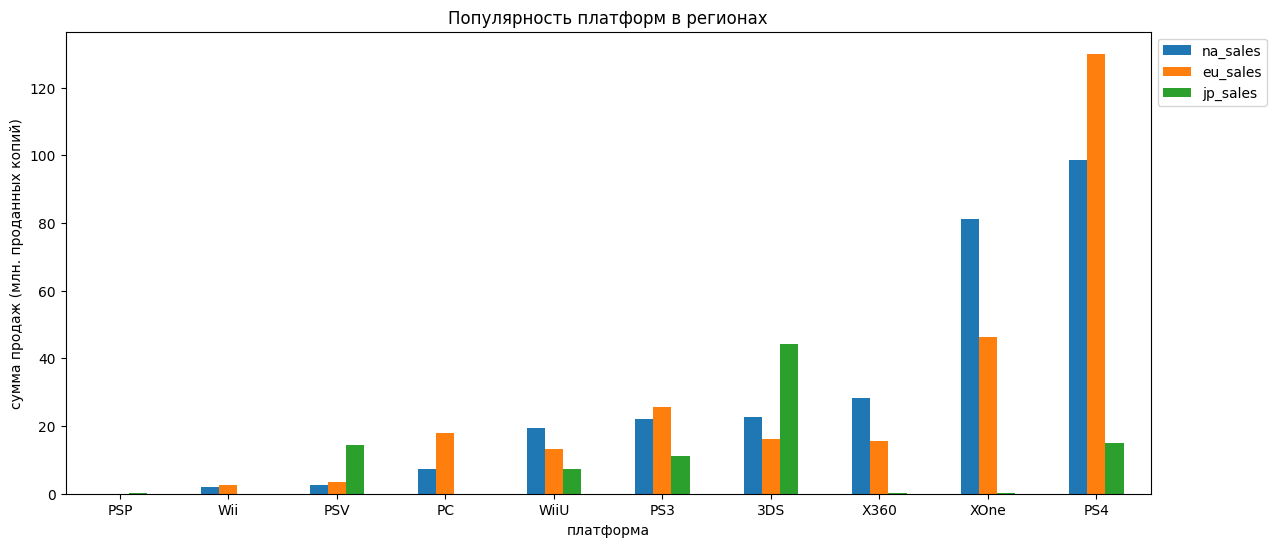

In [65]:
platforms_in_regions.sort_values(by = 'na_sales').plot(
    kind = 'bar',
    figsize = (14,6),
    title = 'Популярность платформ в регионах',
    xlabel = 'платформа',
    ylabel = 'сумма продаж (млн. проданных копий)',
    rot = 0
);
plt.legend(bbox_to_anchor=(1.0, 1.0));

Выбор платформ пользователями сильно различается в различных регионах. Так, к примеру, весьма популярная и занимающая ключевую долю продаж в Северной Америке и Европе платформа XOne, в Японии занимает почти нулевую долю рынка. Похожая ситуация с платформой X360. И наоборот не сильно популярная в Америке и Европе платформа PSV в Японии является фаворитом.

Популярная в Европе платформа PC в Америке и Японии занимает малую долю рынка. и т.п. На графиках можно увидеть все закономерности.

Однако во всех регионах в топ-5 попали такие платформы как PS4, PS3 и 3DS.

#### 4.2 Определим для пользователя каждого региона (NA, EU, JP) самые популярные жанры (топ-5)

In [66]:
#находим суммарные продажи для каждой платформы
#в каждом регионе
genres_in_regions = games_actual2.groupby('genre').agg(
    {
        'na_sales':['sum'],
        'eu_sales':['sum'],
        'jp_sales':['sum']
    
    }
)

#Переименовываем столбцы
genres_in_regions.columns = ['na_sales','eu_sales','jp_sales']

In [67]:
genres_in_regions

,na_sales,eu_sales,jp_sales
genre,,,
Action,72.53,74.68,29.58
Adventure,5.64,6.49,3.60
Fighting,12.43,6.69,6.37
Misc,15.05,12.86,5.61
Platform,6.79,6.80,2.69
Puzzle,0.65,0.52,0.93
Racing,8.74,14.13,1.76
Role-Playing,33.47,28.17,31.16
Shooter,79.02,65.52,4.87


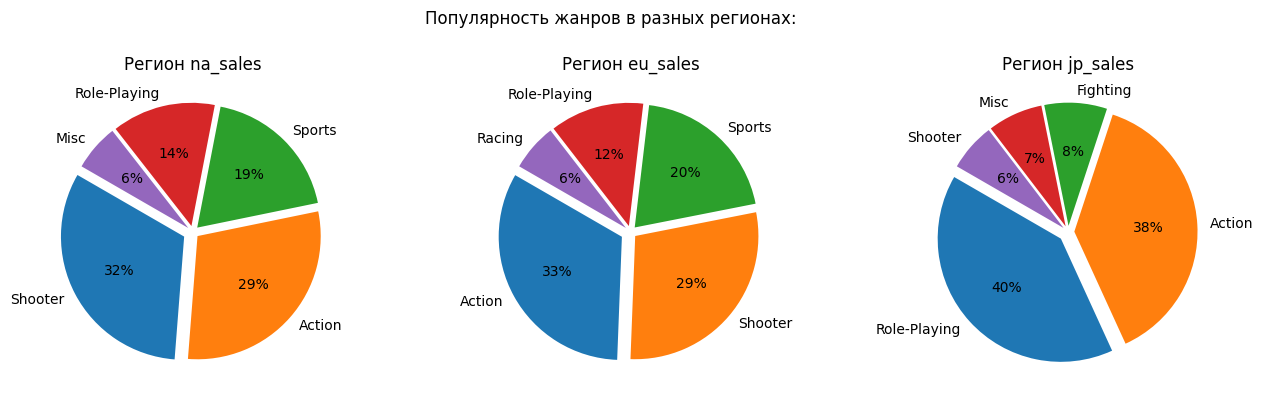

In [68]:
fig, axs = plt.subplots(nrows=1, ncols=3, figsize=(16,4))
fig.suptitle('Популярность жанров в разных регионах:', y=1.05)

explode = (0.08, 0.05, 0.05, 0.05, 0.05)

i = 0
for sales in platforms_in_regions.columns:
    #Строим графики популярности
    genres_in_regions[sales].sort_values(ascending=False).head().plot(
    kind = 'pie',
    ax = axs[i],
    autopct='%1.0f%%',
    explode = explode,
    startangle=150,
    subplots=True);
    axs[i].set_ylabel('')
    axs[i].set_title(f'Регион {sales}')
    i+=1
plt.show()

В топ-5 жанров Северной Америки входят: Shooter, Action, Sports, Role-Playing, Misc 

В топ-5 жанров Европы входят: Action, Shooter, Sports, Role-Playing, Racing 

В топ-5 жанров Японии входят: Role-Playing, Action, Fighting, Misc, Shooter

Также для наглядности совместим графики и посмотрим общую картину:

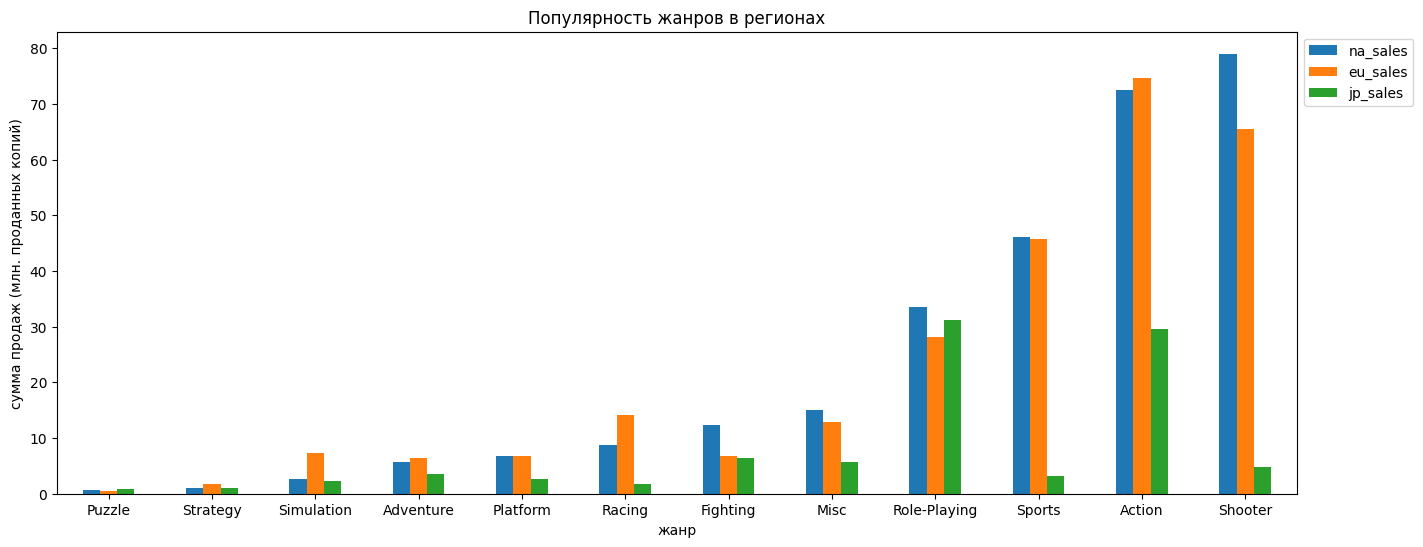

In [69]:
genres_in_regions.sort_values(by = 'na_sales').plot(
    kind = 'bar',
    figsize = (16,6),
    title = 'Популярность жанров в регионах',
    xlabel = 'жанр',
    ylabel = 'сумма продаж (млн. проданных копий)',
    rot = 0
);
plt.legend(bbox_to_anchor=(1.0, 1.0));

Популярные во всех регионах жанры: Shooter, Action и Role-Playing.

Есть некоторые отличия между регионами, например между Северной Америкой и Европой, где жанр Shooter лидирующий по популярности, и Японией, в которой этот жанр замыкает топ-5. Потом к примеру в Японии третье место по популярности занимает жанр Fighting, который в регионах Америки и Европы менее популярен.На графиках можно увидеть все закономерности.

Во всех регионах наменьшим спросом пользуются жанры Puzzle и Strategy



#### 4.3 Посмотрим, влияет ли рейтинг ESRB на продажи в отдельных регионах

Конечно у нас очень много было пропусков в столбце рейтинга ESRB, но попытаемся проанализировать

In [70]:
#Группируем по рейтингу и найходим суммарные 
#продажи игр каждой категории в регионах
ESRB_in_regions = games_actual2.groupby('rating').agg(
    {
        'na_sales':['sum'],
        'eu_sales':['sum'],
        'jp_sales':['sum']
    
    }
)

#Переименовываем столбцы
ESRB_in_regions.columns = ['na_sales','eu_sales','jp_sales']

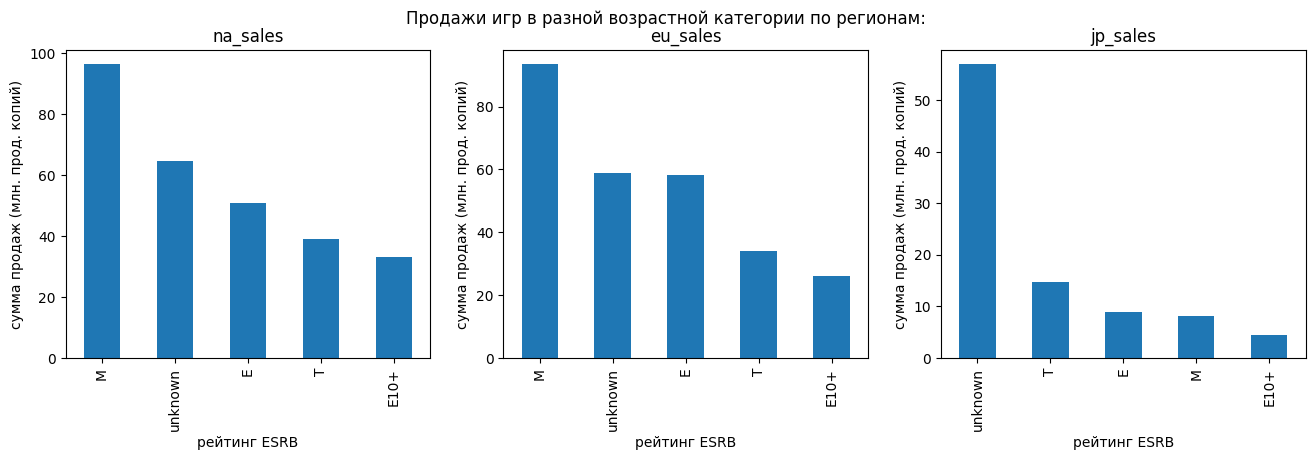

In [71]:
fig, axs = plt.subplots(nrows=1, ncols=3, figsize=(16,4))
fig.suptitle('Продажи игр в разной возрастной категории по регионам:')

i = 0
for sales in platforms_in_regions.columns:
    #Строим графики
    ESRB_in_regions[sales].sort_values(ascending=False).plot(
    kind = 'bar',
    ax = axs[i],
    xlabel = 'рейтинг ESRB',
    ylabel = 'сумма продаж (млн. прод. копий)',
    subplots=True);
    i+=1
plt.show()

В изучаемом датафрейме очень много игр с неуказанной возрастной категорией, можно заметить: 
- в Японии больше всего продаж игр с неуказанной категорией, но это может быть обусловлено наличием своей рейтинговой модели в Японии CERO 
- в Европе и в Северной Америке продажа игр с неуказанной категорией на втором месте, и если в Европе большое количество игр без указанной категории тоже можно обусловить наличием европейской модели рейтинга PEGI, то почему так много в Америке игр с неуказанной категорией - вопрос.

В Северной Америке и Европе больше всего продаж приносят игры с рейтингом M (для взрослых старше 17) и E (для всех).

В Японии больше всего продаж приносят игры с рейтингом T (подросткам от 13 лет) и E.


<a id='section_5'></a>
### Шаг 5. Проверка гипотез

#### 5.1 Проверим гипотезу о том что средние пользовательские рейтинги платформ Xbox One и PC одинаковые.

Для этого проведем статистический тест T-test и расчитаем p-value.

Нулевая гипотеза: средние пользовательские рейтинги в обеих группах равны

Альтернативная гипотеза: средний пользовательский рейтинг на платформе Xbox One  больше или меньше чем на платформе PC.

In [72]:
#Выделяем пользовательские рейтинги обеих платформ
users_score_XOne = games_actual2.query(
    'platform == "XOne" and user_score!=-10'
)['user_score']

users_score_PC = games_actual2.query(
    'platform == "PC" and user_score!=-10'
)['user_score']

# критический уровень статистической значимости
# если p-value окажется меньше него - отвергнем гипотезу
alpha = 0.05

#проведем стат. тест
results = st.ttest_ind(
    users_score_XOne, 
    users_score_PC,
    equal_var=False
)

#получившееся p-значение
print('p-value:{:.2f}'.format( results.pvalue))

# проверяем p-value
if results.pvalue < alpha:
    print('Отвергаем нулевую гипотезу','\n')
else:
    print('Нет оснований отвергнуть нулевую гипотезу','\n')
    
print ('средний пользовательский рейтинг \
на платформе Xbox One = {:.2f}'.format( 
       users_score_XOne.mean()))

print ('средний пользовательский рейтинг \
на платформе PC = {:.2f}'.format( 
       users_score_PC.mean()))

p-value:0.12
Нет оснований отвергнуть нулевую гипотезу 

средний пользовательский рейтинг на платформе Xbox One = 6.59
средний пользовательский рейтинг на платформе PC = 6.30


Вероятность при верной нулевой гипотезе получить наблюдаемое значение или более удалённое от того, которое предположили в нулевой гипотезе = 0.12 (p-value), это больше заданного уровня значимости, поэтому нельзя отвергать нулевую гипотезу.

Данные не противоречат гипотезе о том, что средние пользовательские рейтинги платформ Xbox One и PC равны.

#### 5.2 Проверим гипотезу о том, что средние пользовательские рейтинги жанров Action и Sports разные

Для этого проведем статистический тест T-test и расчитаем p-value.

Нулевая гипотеза: средние пользовательские рейтинги в обеих группах равны

Альтернативная гипотеза: средний пользовательский рейтинг в жанре Action больше или меньше чем в жанре Sports.

In [73]:
#Выделяем пользовательские рейтинги обоих жанров
users_score_Action = games_actual2.query(
    'genre == "Action" and user_score!=-10'
)['user_score']

users_score_Sports = games_actual2.query(
    'genre == "Sports" and user_score!=-10'
)['user_score']

#Уровень стат.значимости
alpha = 0.05

#проведем стат. тест
results = st.ttest_ind(
    users_score_Action, 
    users_score_Sports,
    equal_var=False
)

#получившееся p-значение
print('p-value:{:.2f}'.format( results.pvalue))

# проверяем p-value
if results.pvalue < alpha:
    print('Отвергаем нулевую гипотезу','\n')
else:
    print('Нет оснований отвергнуть нулевую гипотезу','\n')
    
print ('средний пользовательский рейтинг \
жанра Action = {:.2f}'.format(users_score_Action.mean()))

print ('средний пользовательский рейтинг \
жанра Sports = {:.2f}'.format(users_score_Sports.mean()))

p-value:0.00
Отвергаем нулевую гипотезу 

средний пользовательский рейтинг жанра Action = 6.76
средний пользовательский рейтинг жанра Sports = 5.23


Полученное значение p-value меньше заданного уровня значимости, поэтому можно отвергнуть нулевую гипотезу.

Есть основания говорить, что средние пользовательские рейтинги в жанрах Action и Sports различны.

<a id='section_6'></a>
### Шаг 6. Общий вывод

#### Цели исследования:

Необходимо выявить определяющие успешность игры закономерности. Это позволит сделать ставку на потенциально популярный продукт и спланировать рекламные кампании на 2017г.

***
#### Полученные данные были изучены и прошли следующую обработку:

В полученном датафрейме содержится информация о 16715 играх, данные представлены за 1980-2016 годы.

* В 6 столбцах были обнаружены пропуски: в столбце Critic_Score - 51.3%, столбцах Rating - 40.5% и User_Score - 40.1%, в остальных трех столбцах количество пропусков менее 1.6%. 
  
  Пропуски в столбцах могут быть обусловлены какой-то ошибкой записи данных или их выгрузки. (только пару пропусков в имени и жанре может быть вызвана например и человеческим фактором).

* Тип столбца `year_of_release` был изменен на целочисленный, так как год не может быть дробным.

* тип столбца `user_score` был изменен на численный, так как оценка пользователя является числовым значением. 

  В этом столбце также были замечены необычные значения 'tbd' в количестве 2424шт. Природу их происхождения и путей их интерпретации не удалось обнаружить, поэтому эти значения были заменены на пустые значения (что увеличило количество пропусков в этом столбце до 54.6%)

* Пропуски  в столбцах `critic_score` и `user_score` были оставлены как есть. 

* В столбце `rating` больше всего пропусков в значениях рейтинга встречаются на платформах PlayStation(начинаются с PS) и DualScreen (DS). Есть игры, для которых опять же на одной платформе есть данные по рейтингу ESRB а на другой нет. Но восстанавливать строковые данные представляется очень трудоемким, поэтому пропуски были оставлены.

* Строки с пропусками в столбцах `year_of_release`,`name` и `genre` были удалены. Первые в силу того что их не восстановить по другим данным, последние в силу того что их всего пару строк.
  
* Полностью дублирующих строк в датафрейме не было обнаружено. Была обнаружена одна строка дубликат по названию игры, платформе и году релиза, эта строка была удалена.

* В датафрейм был посчитан и добавлен столбец `sales_sum`, cодержащий суммарные продажи игры во всех регионах.

* Также был обнаружен странный выброс 1985 года у DS (1 строка). Гугл говорит нам что первые DS появились в 2004 году, и в датафрейме действительно все данные по этой платформе с 2004 г, кроме этой единственной строки. Данная аномальная/ошибочная строка была удалена.

***

#### Анализ и исследования:

* Было проанализировано, сколько игр выпускалось в разные годы: Видно что до 2001 года выпускалось сравнительно мало игр (до 400 игр), а с 2001 года идет резкий скачок по количеству выпускаемых игр, который достигает своего пика к 2009 году (1427 игр). После 2009 года количество выпускаемых игр идет на спад.

* Было проанализировано как менялись продажи по платформам: Топ 6 платформ с наибольшими продажами это PS2, PS3, X360, PS, DS и Wii. На их примере можно заметить, что в среднем цикл жизни платформы составляет примерно 8 лет. 
  
  На примере платформы PS мы видим что новая версия платформ появлялась через каждые 6-7лет.

  Самой прибыльной за все годы стала платформа PS2.

* Для прогноза успешности игр на 2017 г., был взят за актуальный период данных 2014 - 2016 год.
  
* По суммарной выручке за период 2014-2016г среди лидирующих платформы - PS4, XOne и 3DS.  Динамика продаж платформ по годам для 2014-2016г видна на следующем графике:

    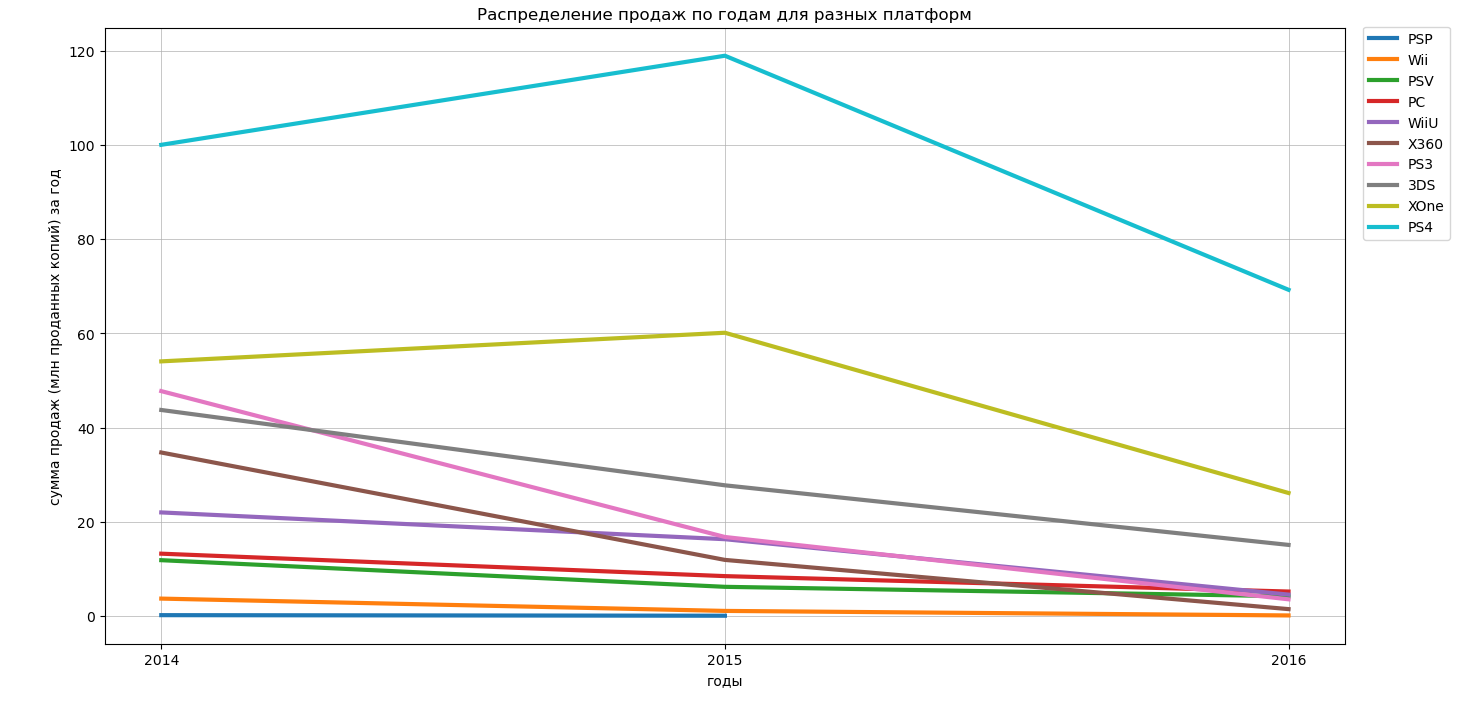

   Стоит также учитывать что данные за 2016г могут быть неполными, поэтому для вывода ориентируемся на данные до 2015г включительно. Потенциально прибыльными можно считать только две платформы - PS4 и XOne. По платформе 3DS - хотя у нее и неплохая суммарная выручка, но мы видим тенденцию к падению продаж, поэтому не будем включать ее в список потенциально прибыльных платформ.  

* По диафграмме размаха также видны лидирующие в 2014-2016г платформы с самыми дорогими продажами - PS4 и XOne. Но интересно что по медианам продаж многие платформы плюс минус на одном уровне (PS4, Wii, WiiU, X360 и XOne):

    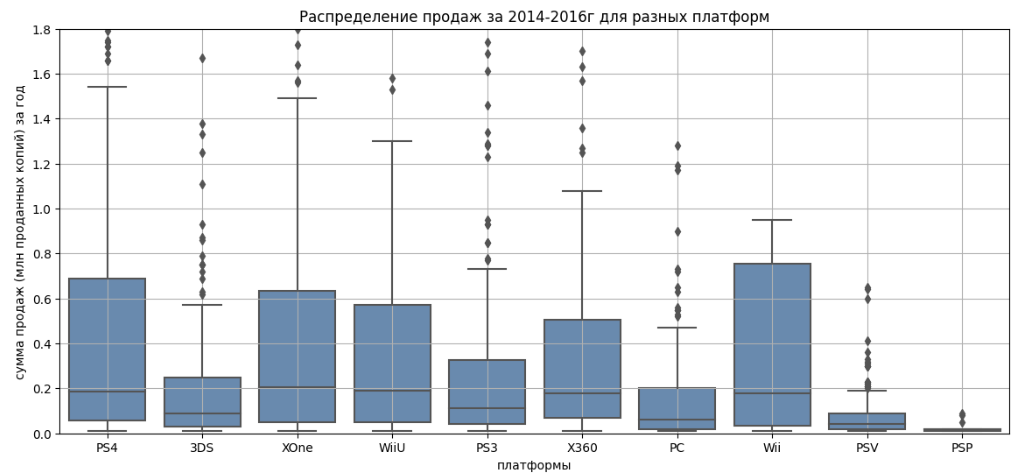

* Было исследовано как влияют на продажи внутри одной популярной платформы отзывы пользователей и критиков (для анализа была взята XOne):

    Учитывая коэффициент корреляции между оценками критиков и продажами = 0.16, можно заключить что прямой связи между этими двумя величинами нет (очень слабая корреляция).
    
    Учитывая коэффициент корреляции между оценками пользователей и продажами = 0.03, можно заключить что прямой связи между этими двумя величинами нет.
    
    На других платформах в целом существует также некоторая слабая корреляция между отзывами критиков и продажами игр, но нельзя заключить что есть прямая связь (коэф. Пирсона < 0.4).
    
    Связи между отзывами пользователей и продажами игр нет, кроме платформы WiiU (где слабая связь, коэф. корреляции = 0.38) и платформы Wii(где есть прямая связь, коэф. корреляции = 0.65)
    
* Было проанализировано распределение игр по жанрам: 

   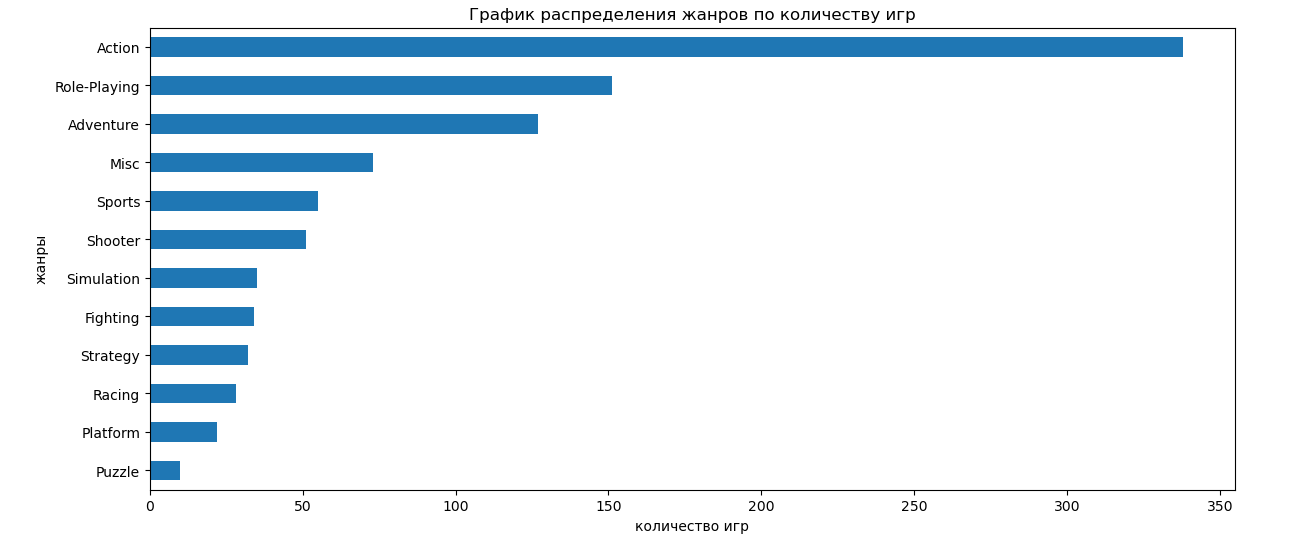
   
    Больше всего игр выпускается в жанрах Action, Role-Playing и Adventure. Меньше всего выпускается игр в жанре Puzzle, Platform и Racing. 
    
    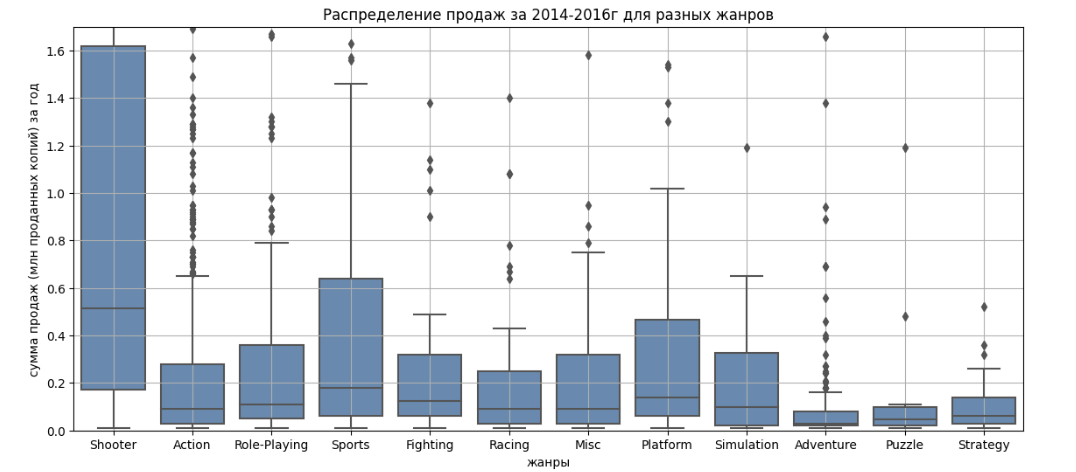
    
    Самую большую прибыль приносят игры в жанре Shooter и Sports. Далее по прибыльности и ряду успешно продающихся игр следует жанр Platform и Role-Playing.

    Наименьшую прибыль приносят жанры Adventure и Puzzle.


* Происследована популярность платформ для пользователя каждого региона (NA, EU, JP). Самые популярные платформы (топ-5) по регионам:

    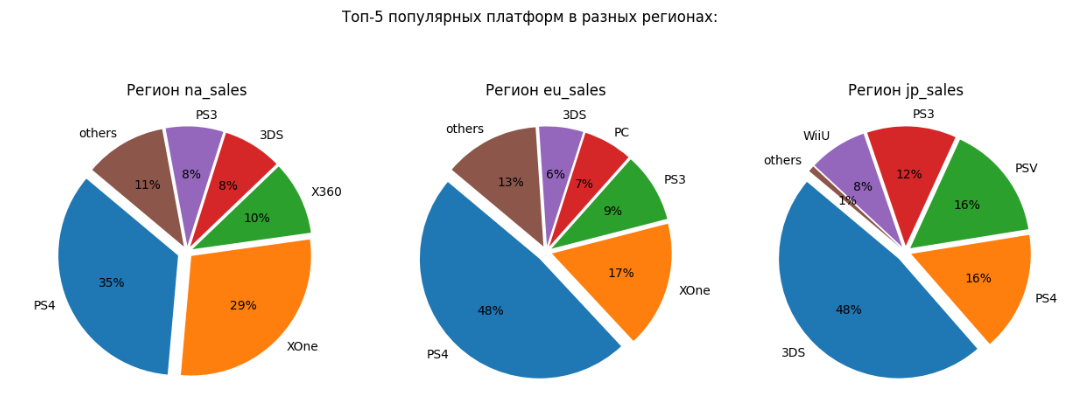

    В топ-5 платформ Серевной Америки входят: PS4, XOne, X360, 3DS и PS3

    В топ-5 платформ Европы входят: PS4, XOne, PS3, PC и 3DS

    В топ-5 платформ Японии входят: 3DS, PS4, PSV, PS3, WiiU.
    
    Общий график:
    
    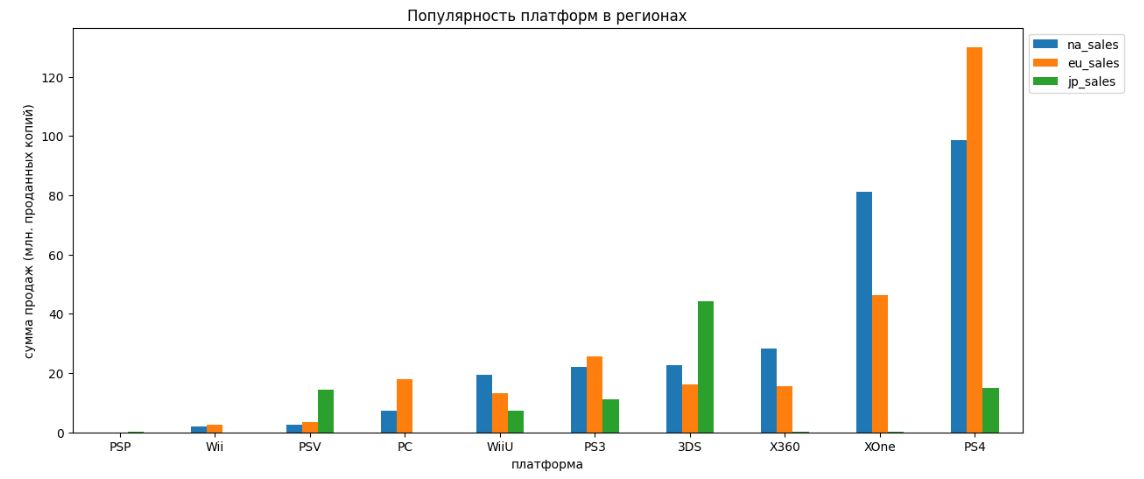

    Выбор платформ пользователями сильно различается в различных регионах. Так, к примеру, весьма популярная и занимающая ключевую долю продаж в Северной Америке и Европе платформа XOne, в Японии занимает почти нулевую долю рынка. Похожая ситуация с платформой X360. И наоборот не сильно популярная в Америке и Европе платформа PSV в Японии является фаворитом.

    Популярная в Европе платформа PC в Америке и Японии занимает малую долю рынка. и т.п. На графиках можно увидеть все закономерности.

    Однако во всех регионах в топ-5 попали такие платформы как PS4, PS3 и 3DS.
    
* Происследована популярность жанров для пользователя каждого региона (NA, EU, JP). Самые популярные жанры (топ-5) по регионам:

    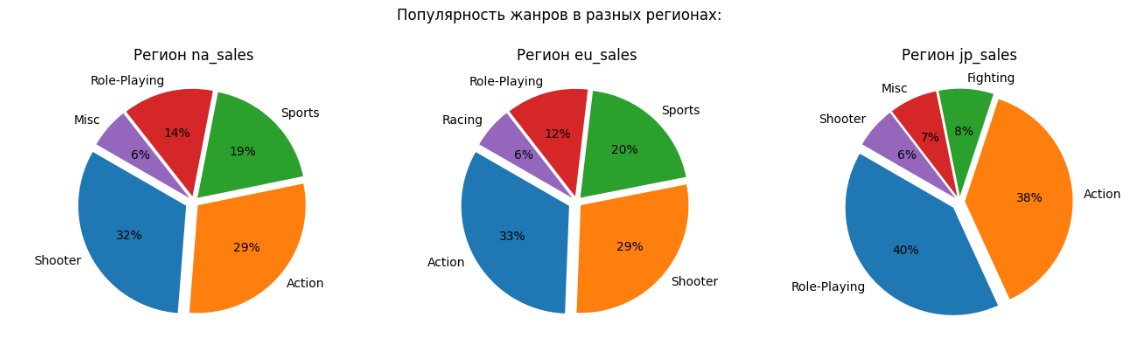

    В топ-5 жанров Северной Америки входят: Shooter, Action, Sports, Role-Playing, Misc

    В топ-5 жанров Европы входят: Action, Shooter, Sports, Role-Playing, Racing

    В топ-5 жанров Японии входят: Role-Playing, Action, Fighting, Misc, Shooter
    
    Общий график:
    
   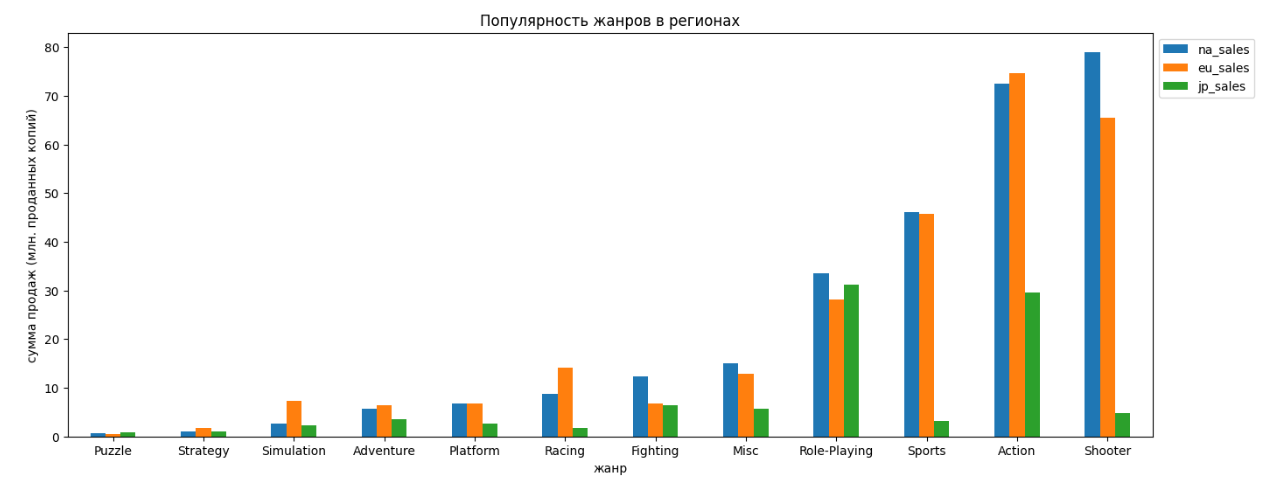

    Популярные во всех регионах жанры: Shooter, Action и Role-Playing.

    Есть некоторые отличия между регионами, например между Северной Америкой и Европой, где жанр Shooter лидирующий по популярности, и Японией, в которой этот жанр замыкает топ-5. Потом к примеру в Японии третье место по популярности занимает жанр Fighting, который в регионах Америки и Европы менее популярен.На графиках можно увидеть все закономерности.

    Во всех регионах наменьшим спросом пользуются жанры Puzzle и Strategy

    
* Проведен анализ влияния рейтинга ESRB на продажи в регионах:
    
    В изучаемом датафрейме очень много игр с неуказанной возрастной категорией, можно заметить: 
    - в Японии больше всего продаж игр с неуказанной категорией, но это может быть обусловлено наличием своей рейтинговой модели в Японии CERO 
    - в Европе и в Северной Америке продажа игр с неуказанной категорией на втором месте, и если в Европе большое количество игр без указанной категории тоже можно обусловить наличием европейской модели рейтинга PEGI, то почему так много в Америке игр с неуказанной категорией - вопрос.

    В Северной Америке и Европе больше всего продаж приносят игры с рейтингом M (для взрослых старше 17) и E (для всех).

    В Японии больше всего продаж приносят игры с рейтингом T (подросткам от 13 лет) и E.ы.

    
**Проведен анализ следующих гипотез:**

Для анализа гипотез был проведен статистический тест T-test и расчет p-value.

**Гипотеза 1.** Одинаковы ли средние пользовательские рейтинги платформ Xbox One и PC?

    Нулевая гипотеза: средние пользовательские рейтинги в обеих группах равны
    Альтернативная гипотеза: средний пользовательский рейтинг на платформе Xbox One  больше или меньше чем на платформе PC.

Уровень статистической значимости был принят 0.05. 

Вероятность при верной нулевой гипотезе получить наблюдаемое значение или более удалённое от того, которое предположили в нулевой гипотезе = 0.12 (p-value), это больше заданного уровня значимости, поэтому нельзя отвергать нулевую гипотезу.

Данные не противоречат гипотезе о том, что средние пользовательские рейтинги платформ Xbox One и PC равны.

**Гипотеза 2.** Различаются ли средние пользовательские рейтинги жанров Action и Sports?

    Нулевая гипотеза: средние пользовательские рейтинги в обеих группах равны
    Альтернативная гипотеза: средний пользовательский рейтинг в жанре Action больше или меньше чем в жанре Sports.

Уровень статистической значимости был принят 0.05, полученное p-value: 0. Есть основания говорить, что средние пользовательские рейтинги в жанрах Action и Sports различны.

***
### Рекомендации:

Потенциально популярным и прибыльным продуктом в 2017г могут стать:

* В Северной Америке и Европе: игры в жанрах Shooter, Sports и  Role-Playing, для возрастной категории M или E, выпускаемые на платформах PS4 и XOne
* В Японии: игры в жанрах Role-Playing и Shooter, для возрастной категории T или E, выпускаемые на платформе PS4
